# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:37:26.843643: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:37:29.683079
2025-04-14 22:37:29.683079


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:37:24"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

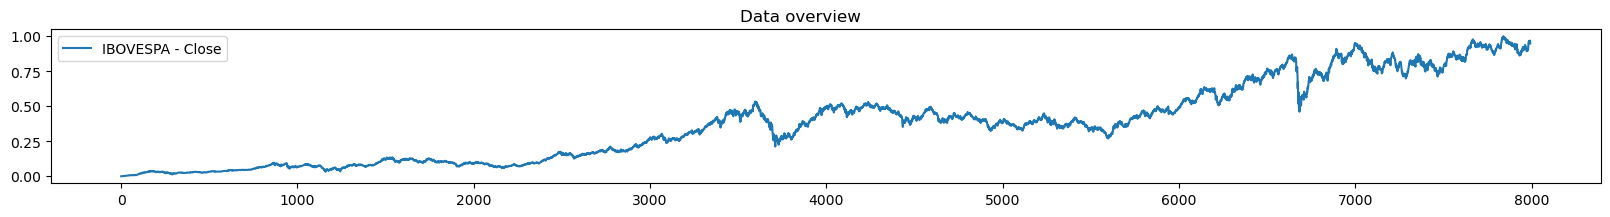

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

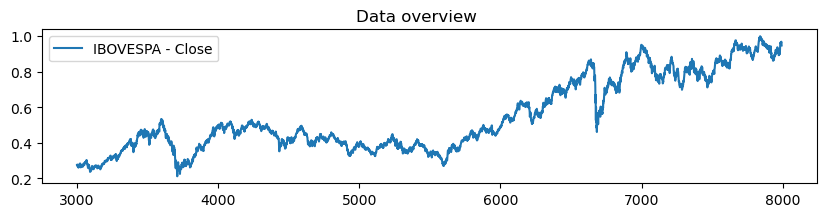

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

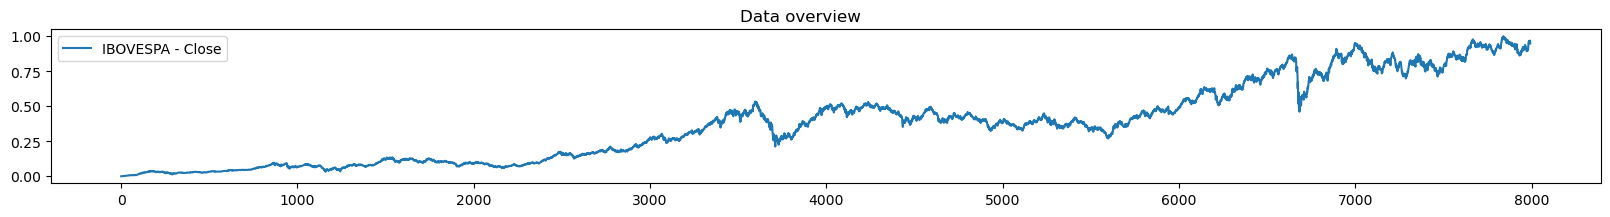

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

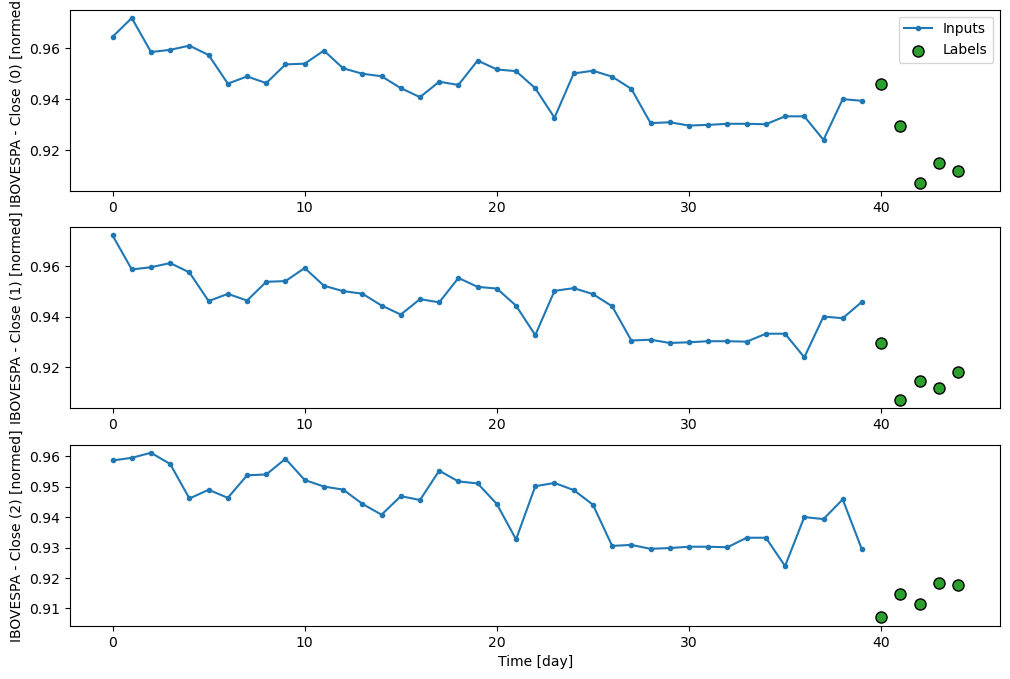

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:22 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.3151 - mean_squared_error: 6.3151e-05 - root_mean_squared_error: 0.0078 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 59.6937 - mean_squared_error: 7.0566e-05 - root_mean_squared_error: 0.0083

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 50.9749 - mean_squared_error: 6.6058e-05 - root_mean_squared_error: 0.0081

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 46.7549 - mean_squared_error: 6.2325e-05 - root_mean_squared_error: 0.0078

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 42.3730 - mean_squared_error: 5.8820e-05 - root_mean_squared_error: 0.0076

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 40.0292 - mean_squared_error: 5.6571e-05 - root_mean_squared_error: 0.0074

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.0014 - mean_squared_error: 5.4470e-05 - root_mean_squared_error: 0.0073

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.2456 - mean_squared_error: 5.2599e-05 - root_mean_squared_error: 0.0072

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 34.7248 - mean_squared_error: 5.0990e-05 - root_mean_squared_error: 0.0071

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.4582 - mean_squared_error: 5.0731e-05 - root_mean_squared_error: 0.0070

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 32.4632 - mean_squared_error: 5.3999e-05 - root_mean_squared_error: 0.0072

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 31.2616 - mean_squared_error: 6.2181e-05 - root_mean_squared_error: 0.0077

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 30.3866 - mean_squared_error: 7.3481e-05 - root_mean_squared_error: 0.0082

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 29.8306 - mean_squared_error: 7.9360e-05 - root_mean_squared_error: 0.0085

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.1565 - mean_squared_error: 8.7597e-05 - root_mean_squared_error: 0.0089

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 28.7613 - mean_squared_error: 9.2390e-05 - root_mean_squared_error: 0.0091

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.2450 - mean_squared_error: 9.9530e-05 - root_mean_squared_error: 0.0095

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 27.9167 - mean_squared_error: 1.0357e-04 - root_mean_squared_error: 0.0097

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.6124 - mean_squared_error: 1.0802e-04 - root_mean_squared_error: 0.0099

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.1995 - mean_squared_error: 1.1604e-04 - root_mean_squared_error: 0.0102

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.9249 - mean_squared_error: 1.2059e-04 - root_mean_squared_error: 0.0104

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 26.6653 - mean_squared_error: 1.2497e-04 - root_mean_squared_error: 0.0106

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 26.4117 - mean_squared_error: 1.2897e-04 - root_mean_squared_error: 0.0108

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.1558 - mean_squared_error: 1.3243e-04 - root_mean_squared_error: 0.0109

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 25.7969 - mean_squared_error: 1.3724e-04 - root_mean_squared_error: 0.0111

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 25.4590 - mean_squared_error: 1.4150e-04 - root_mean_squared_error: 0.0113

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 25.2425 - mean_squared_error: 1.4403e-04 - root_mean_squared_error: 0.0114

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 25.0515 - mean_squared_error: 1.4665e-04 - root_mean_squared_error: 0.0116

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.8715 - mean_squared_error: 1.4911e-04 - root_mean_squared_error: 0.0117

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 24.6099 - mean_squared_error: 1.5249e-04 - root_mean_squared_error: 0.0118

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 24.4543 - mean_squared_error: 1.5504e-04 - root_mean_squared_error: 0.0119

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 24.3176 - mean_squared_error: 1.5871e-04 - root_mean_squared_error: 0.0120

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 24.1937 - mean_squared_error: 1.6355e-04 - root_mean_squared_error: 0.0122

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 24.1140 - mean_squared_error: 1.8373e-04 - root_mean_squared_error: 0.0127

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 24.0347 - mean_squared_error: 2.0270e-04 - root_mean_squared_error: 0.0131

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 23.9586 - mean_squared_error: 2.2090e-04 - root_mean_squared_error: 0.0136

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 23.8468 - mean_squared_error: 2.4702e-04 - root_mean_squared_error: 0.0142

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 23.7783 - mean_squared_error: 2.6442e-04 - root_mean_squared_error: 0.0146

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 23.7080 - mean_squared_error: 2.8087e-04 - root_mean_squared_error: 0.0150

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 23.6092 - mean_squared_error: 3.0617e-04 - root_mean_squared_error: 0.0155

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 23.5467 - mean_squared_error: 3.2360e-04 - root_mean_squared_error: 0.0159

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 23.4465 - mean_squared_error: 3.4786e-04 - root_mean_squared_error: 0.0164

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 23.3754 - mean_squared_error: 3.6281e-04 - root_mean_squared_error: 0.0168

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 23.3009 - mean_squared_error: 3.7686e-04 - root_mean_squared_error: 0.0171

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 23.1856 - mean_squared_error: 3.9674e-04 - root_mean_squared_error: 0.0175

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 23.1064 - mean_squared_error: 4.0928e-04 - root_mean_squared_error: 0.0178

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 22.9849 - mean_squared_error: 4.2720e-04 - root_mean_squared_error: 0.0182

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 22.8639 - mean_squared_error: 4.4539e-04 - root_mean_squared_error: 0.0186

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 22.7952 - mean_squared_error: 4.6258e-04 - root_mean_squared_error: 0.0189

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 22.7333 - mean_squared_error: 4.8161e-04 - root_mean_squared_error: 0.0193

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 22.6715 - mean_squared_error: 5.0022e-04 - root_mean_squared_error: 0.0196

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 22.5854 - mean_squared_error: 5.3190e-04 - root_mean_squared_error: 0.0202

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 22.5131 - mean_squared_error: 5.7813e-04 - root_mean_squared_error: 0.0209

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 22.4706 - mean_squared_error: 6.1485e-04 - root_mean_squared_error: 0.0214

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 22.4078 - mean_squared_error: 6.6948e-04 - root_mean_squared_error: 0.0222

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 22.3457 - mean_squared_error: 7.2368e-04 - root_mean_squared_error: 0.0229

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 22.3039 - mean_squared_error: 7.5885e-04 - root_mean_squared_error: 0.0234

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 22.2375 - mean_squared_error: 8.0870e-04 - root_mean_squared_error: 0.0241

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 22.1919 - mean_squared_error: 8.4031e-04 - root_mean_squared_error: 0.0245

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 22.1252 - mean_squared_error: 8.8761e-04 - root_mean_squared_error: 0.0252

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 22.0557 - mean_squared_error: 9.3232e-04 - root_mean_squared_error: 0.0258

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 22.0078 - mean_squared_error: 9.6054e-04 - root_mean_squared_error: 0.0262

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 21.9345 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0268    

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 21.8612 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0273

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 21.8114 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 21.7347 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 21.6837 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 21.6332 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 21.5565 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 21.4783 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 21.4265 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 21.3507 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 21.2755 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.2267 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 21.1566 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 21.1116 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 21.0673 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.0023 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 20.9592 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 20.8954 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 20.8541 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 20.7915 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 20.7288 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 20.6865 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 20.6234 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.5657 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 20.5275 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 20.4711 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 20.4170 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.3817 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 20.3279 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 20.2737 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 20.2374 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 20.1822 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 20.1451 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 20.0895 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 20.0711 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384 - val_loss: 0.0679 - val_mean_absolute_error: 0.0679 - val_mean_absolute_percentage_error: 7.1930 - val_mean_squared_error: 0.0052 - val_root_mean_squared_error: 0.0720 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.5917 - mean_absolute_error: 0.5917 - mean_absolute_percentage_error: 7950.6699 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5917

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5911 - mean_absolute_error: 0.5911 - mean_absolute_percentage_error: 6101.9771 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5912 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5868 - mean_absolute_error: 0.5868 - mean_absolute_percentage_error: 5299.1250 - mean_squared_error: 0.3445 - root_mean_squared_error: 0.5869

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5800 - mean_absolute_error: 0.5800 - mean_absolute_percentage_error: 4782.2344 - mean_squared_error: 0.3370 - root_mean_squared_error: 0.5804

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5696 - mean_absolute_error: 0.5696 - mean_absolute_percentage_error: 4415.6680 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5709

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5857 - mean_absolute_error: 0.5857 - mean_absolute_percentage_error: 4133.6328 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6305

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5841 - mean_absolute_error: 0.5841 - mean_absolute_percentage_error: 3954.3789 - mean_squared_error: 0.4327 - root_mean_squared_error: 0.6480

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5772 - mean_absolute_error: 0.5772 - mean_absolute_percentage_error: 3718.1726 - mean_squared_error: 0.4466 - root_mean_squared_error: 0.6597

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5656 - mean_absolute_error: 0.5656 - mean_absolute_percentage_error: 3506.9270 - mean_squared_error: 0.4467 - root_mean_squared_error: 0.6611

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 3393.5874 - mean_squared_error: 0.4571 - root_mean_squared_error: 0.6690

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5570 - mean_absolute_error: 0.5570 - mean_absolute_percentage_error: 3234.1104 - mean_squared_error: 0.4636 - root_mean_squared_error: 0.6745

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5489 - mean_absolute_error: 0.5489 - mean_absolute_percentage_error: 3088.5735 - mean_squared_error: 0.4638 - root_mean_squared_error: 0.6753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 2998.6462 - mean_squared_error: 0.4616 - root_mean_squared_error: 0.6740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5321 - mean_absolute_error: 0.5321 - mean_absolute_percentage_error: 2873.0488 - mean_squared_error: 0.4559 - root_mean_squared_error: 0.6701

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_absolute_percentage_error: 2758.1812 - mean_squared_error: 0.4485 - root_mean_squared_error: 0.6648

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5135 - mean_absolute_error: 0.5135 - mean_absolute_percentage_error: 2686.8167 - mean_squared_error: 0.4430 - root_mean_squared_error: 0.6606

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5021 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 2586.9451 - mean_squared_error: 0.4343 - root_mean_squared_error: 0.6539

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4908 - mean_absolute_error: 0.4908 - mean_absolute_percentage_error: 2494.7261 - mean_squared_error: 0.4253 - root_mean_squared_error: 0.6468

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4834 - mean_absolute_error: 0.4834 - mean_absolute_percentage_error: 2437.1152 - mean_squared_error: 0.4192 - root_mean_squared_error: 0.6419

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 2355.9333 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6345

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 2280.4846 - mean_squared_error: 0.4013 - root_mean_squared_error: 0.6270

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 2233.0933 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6221

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 2165.9524 - mean_squared_error: 0.3870 - root_mean_squared_error: 0.6148

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 2123.6252 - mean_squared_error: 0.3815 - root_mean_squared_error: 0.6100

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 2063.4709 - mean_squared_error: 0.3734 - root_mean_squared_error: 0.6029

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4235 - mean_absolute_error: 0.4235 - mean_absolute_percentage_error: 2025.4386 - mean_squared_error: 0.3682 - root_mean_squared_error: 0.5982

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4176 - mean_absolute_error: 0.4176 - mean_absolute_percentage_error: 1988.9493 - mean_squared_error: 0.3631 - root_mean_squared_error: 0.5937

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4119 - mean_absolute_error: 0.4119 - mean_absolute_percentage_error: 1953.9227 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5892

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 1920.2579 - mean_squared_error: 0.3534 - root_mean_squared_error: 0.5848

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3984 - mean_absolute_error: 0.3984 - mean_absolute_percentage_error: 1872.1377 - mean_squared_error: 0.3464 - root_mean_squared_error: 0.5783

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 1841.5372 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5740

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 1812.0458 - mean_squared_error: 0.3374 - root_mean_squared_error: 0.5699

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 1797.6953 - mean_squared_error: 0.3353 - root_mean_squared_error: 0.5679

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1783.6013 - mean_squared_error: 0.3331 - root_mean_squared_error: 0.5658

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 1756.1500 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5618

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 1716.7122 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5560

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 1691.5133 - mean_squared_error: 0.3190 - root_mean_squared_error: 0.5522

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1667.1339 - mean_squared_error: 0.3151 - root_mean_squared_error: 0.5484

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 1632.0142 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5430

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1609.5142 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5394

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1587.7040 - mean_squared_error: 0.3025 - root_mean_squared_error: 0.5359

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1556.2195 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5308

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1536.0016 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5274

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1516.3683 - mean_squared_error: 0.2909 - root_mean_squared_error: 0.5242

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1497.2969 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5210

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1478.7622 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5178

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1451.9133 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5132

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1434.6162 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5102

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1409.5375 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.5057

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1385.4681 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.5015

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1369.9429 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4987

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1347.3801 - mean_squared_error: 0.2627 - root_mean_squared_error: 0.4946

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1325.6476 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4906

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1311.5981 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.4880

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1291.1465 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4842

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1277.9082 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4817

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1264.9727 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4793

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1246.1189 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4757

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1233.9036 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4733

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1216.0819 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4699

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1204.5201 - mean_squared_error: 0.2380 - root_mean_squared_error: 0.4676

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1193.2037 - mean_squared_error: 0.2361 - root_mean_squared_error: 0.4654

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1182.1254 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4632

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1165.9379 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4599

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1155.4213 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4578

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1145.1160 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4557

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1135.0159 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4537

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1125.1147 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4516

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1110.6230 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4487

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1096.5459 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4457

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1082.8650 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4428

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1073.9558 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4410

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1060.8987 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4382

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1052.3915 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4364

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1039.9169 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4337

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1027.7747 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4310

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1019.8577 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4293

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1008.2376 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4268

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1000.6556 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4251

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 989.5199 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4226 

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 978.6605 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4202

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 968.0677 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4178

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 961.1478 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4162

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 954.3381 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4147

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 947.6360 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4132

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 937.7789 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4109

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 931.3364 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4094

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 921.8597 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.4073

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 915.6624 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4058

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 909.5577 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4044

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 900.5705 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4023

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 894.6890 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.4009

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 886.0272 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3989

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 877.5514 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3969

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 872.0013 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3956

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 863.8223 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3936

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 855.8135 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3917

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 847.9799 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3898 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283 - val_mean_absolute_percentage_error: 2.9833 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 6498.2686 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4839

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4814 - mean_absolute_error: 0.4814 - mean_absolute_percentage_error: 5421.1133 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4815 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4743 - mean_absolute_error: 0.4743 - mean_absolute_percentage_error: 4303.4341 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4746

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4686 - mean_absolute_error: 0.4686 - mean_absolute_percentage_error: 3881.6523 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4690

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4581 - mean_absolute_error: 0.4581 - mean_absolute_percentage_error: 3470.3723 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4590

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 3168.7632 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4471

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4346 - mean_absolute_error: 0.4346 - mean_absolute_percentage_error: 3000.7756 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4384

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2779.1794 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4246

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - mean_absolute_percentage_error: 2649.4749 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.4156

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 2478.8577 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.4029

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3709 - mean_absolute_error: 0.3709 - mean_absolute_percentage_error: 2330.1123 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3909

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 2241.3489 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3834

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 2159.7412 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3762

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 2049.0237 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3661

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1982.0510 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3598

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1890.3290 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3509

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1807.6600 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3427

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1732.7263 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3350

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1664.4635 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3278

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1602.0110 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3210

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1544.6217 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3147

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1508.8702 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.3107

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1458.6144 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.3049

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1427.1647 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.3013

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1382.7732 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2961

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1341.4121 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2911

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1315.3619 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2880

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1278.3700 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2834

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1243.6541 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2791

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1221.6671 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2763

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1190.2833 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2723

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1160.6659 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2685

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 1141.8265 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 1123.6639 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2636

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 1106.1420 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2613

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 1089.2251 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2591

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 1064.9165 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2558

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 1049.3784 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2537

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 1027.0082 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2506

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 1012.6811 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2486

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 992.0146 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2457 

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 972.2756 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2430

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 959.5994 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2412

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 941.2676 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2385

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 923.7091 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2360

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 912.4111 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2344

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 896.0362 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2320

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 880.3159 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2297

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 870.1808 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2282

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 855.4658 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2260

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 841.2999 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2239

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 832.1449 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2226

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 818.8266 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2206

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 805.9824 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2187

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 793.5839 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2168

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 781.6065 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2150

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 770.0280 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2132

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 762.5201 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2120

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 751.5616 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2103

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 740.9526 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2087

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 734.0645 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2076

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 723.9976 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2060

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 714.2372 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2045

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 707.8929 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2034

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 698.6093 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2020

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 692.5704 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2010

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 686.6483 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2000

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 680.8400 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.1991

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 675.1406 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.1981

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 666.7896 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.1968

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 661.3503 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1959

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 653.3762 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1946

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 645.6141 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.1933

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 640.5527 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1924

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 633.1246 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.1912

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 625.8868 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1900

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 621.1635 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1892

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 614.2268 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1880

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 607.4614 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1869

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 603.0425 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1861

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 596.5483 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1850

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 590.2094 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1839

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 586.0664 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1832

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 579.9734 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1822

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 574.0213 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1812

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 570.1285 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1805

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 564.3994 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1795

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 558.7975 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1785

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 555.1315 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1779

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 549.7322 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1770

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 544.4487 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1761

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 540.9946 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1755 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5682 - val_mean_squared_error: 3.0542e-04 - val_root_mean_squared_error: 0.0175 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 3473.4585 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2588

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 2893.5715 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2570 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 2291.5483 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2518

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 2057.7925 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2469

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1888.5842 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2409

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1686.8910 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2306

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1577.4872 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2238

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 1485.1288 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2176

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1404.9635 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2119

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 1368.2917 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2091

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 1333.6967 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2065

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1270.2646 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.2014

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 1213.4525 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1967

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 1162.1090 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1923

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 1093.6576 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1862

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1052.9639 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1825

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 997.9779 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1773 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 964.8642 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1741

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 934.1912 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1710

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 905.6469 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1681

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 879.0211 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1654

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 842.2455 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1615

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 819.6071 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1591

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 788.1230 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1556

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 759.2597 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1524

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 741.3145 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1504

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 716.1281 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1475

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 700.3881 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1457

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 685.4151 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1439

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 664.2697 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1414

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 650.9769 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1398

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 638.2769 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1382

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 626.1255 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1367

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 608.8481 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1345

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 592.6143 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1325

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 582.3243 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1312

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 567.6242 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1293

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 553.7368 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1275

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 544.8961 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1263

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 532.2160 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1246

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 524.1253 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1235

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 516.3069 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1225

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 508.7467 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1214

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 501.4317 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1204

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 490.8918 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1190

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 480.8378 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1176

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 474.3883 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1167

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 465.0707 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1154

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 459.0840 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1145

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 450.4229 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1133

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 442.1231 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1121

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 436.7789 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1113

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 429.0302 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1102

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 421.5839 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1091

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 416.7793 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1084

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 409.7987 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1073

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 403.0757 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1063

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 398.7292 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1057

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 392.4038 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1047

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 388.3106 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1041

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 382.3475 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1032

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 376.5860 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1023

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 372.8515 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1017

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 367.4026 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1009

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 362.1290 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1001

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 358.7064 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0995

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 353.7060 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0987

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 348.8588 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0980

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 345.7092 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0975

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 341.1025 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0967

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 336.6309 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0960

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 333.7219 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0955

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 329.4625 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0948

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 326.6900 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0944

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 323.9693 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0939

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 321.2987 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0935

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 318.6770 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0931

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 314.8330 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0924

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 311.0915 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0918

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 308.6519 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0914

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 305.0721 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0908

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 302.7369 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0904

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 299.3080 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0898

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 295.9647 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0893

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 293.7816 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0889

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 290.5737 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0884

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 287.4438 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0878

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 285.3986 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0875

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 282.3913 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0870

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 279.4538 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0865

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 277.5331 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0861

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 274.7067 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0857

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 271.9440 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0852

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 270.1363 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0849

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 267.4746 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0844

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 264.8708 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0840

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 262.3260 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0835 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353 - val_mean_absolute_percentage_error: 3.7491 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0377 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 1209.1510 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 911.1526 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 779.1104 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 647.1234 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 565.9148 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 525.4692 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 476.2930 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0670

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 437.6130 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 415.6277 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 396.1443 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 378.6482 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0596

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 362.8476 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 341.7985 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 329.2369 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 312.2619 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 297.2119 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 288.0764 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 275.5472 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 264.2292 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 253.9426 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 244.5369 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 235.9066 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 230.5328 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 225.4427 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 220.6058 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 213.7853 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 209.5082 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 205.4280 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 199.6477 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 195.9993 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 190.8051 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 185.9186 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 182.8185 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 178.3839 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 174.1893 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 171.5168 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 167.6797 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 164.0349 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 161.7050 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 158.3491 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 155.1486 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 153.0959 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 151.1042 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 149.1712 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 146.3749 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 144.5770 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 142.8298 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 141.1304 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 139.4766 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 137.0770 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 135.5287 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 133.2793 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.1130 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 129.7124 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 128.3454 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 127.0107 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 125.0669 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 123.1893 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.9728 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.1983 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.4814 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 117.3674 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.7403 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 114.1634 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.1388 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.6406 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 110.1868 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.2412 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 107.8569 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 106.5119 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.6363 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.3530 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.1044 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 102.2907 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 101.0968 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 99.9340 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 99.1755 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.4299 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.6969 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 96.9762 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 95.9174 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 95.2259 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 94.2099 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 93.2188 - mean_squared_error: 9.9963e-04 - root_mean_squared_error: 0.0285

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 92.5712 - mean_squared_error: 9.9392e-04 - root_mean_squared_error: 0.0284

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 91.6191 - mean_squared_error: 9.8579e-04 - root_mean_squared_error: 0.0283

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 90.6890 - mean_squared_error: 9.7797e-04 - root_mean_squared_error: 0.0282

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 90.0810 - mean_squared_error: 9.7299e-04 - root_mean_squared_error: 0.0281

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 89.1863 - mean_squared_error: 9.6577e-04 - root_mean_squared_error: 0.0280

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 88.3119 - mean_squared_error: 9.5888e-04 - root_mean_squared_error: 0.0279

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 87.7396 - mean_squared_error: 9.5439e-04 - root_mean_squared_error: 0.0279

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 86.8970 - mean_squared_error: 9.4788e-04 - root_mean_squared_error: 0.0278

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 86.3455 - mean_squared_error: 9.4365e-04 - root_mean_squared_error: 0.0277

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 85.5335 - mean_squared_error: 9.3761e-04 - root_mean_squared_error: 0.0276

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 85.2672 - mean_squared_error: 9.3564e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3652 - val_mean_squared_error: 2.4995e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 353.3038 - mean_squared_error: 7.5095e-04 - root_mean_squared_error: 0.0274

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 251.2291 - mean_squared_error: 5.9259e-04 - root_mean_squared_error: 0.0242 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 210.0620 - mean_squared_error: 5.1241e-04 - root_mean_squared_error: 0.0224

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 176.6885 - mean_squared_error: 4.5729e-04 - root_mean_squared_error: 0.0211

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 155.9695 - mean_squared_error: 4.2005e-04 - root_mean_squared_error: 0.0202

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 146.0384 - mean_squared_error: 4.0420e-04 - root_mean_squared_error: 0.0199

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 133.9136 - mean_squared_error: 3.8189e-04 - root_mean_squared_error: 0.0193

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 124.1302 - mean_squared_error: 3.6206e-04 - root_mean_squared_error: 0.0188

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 118.5418 - mean_squared_error: 3.5013e-04 - root_mean_squared_error: 0.0184

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 111.1468 - mean_squared_error: 3.3326e-04 - root_mean_squared_error: 0.0180

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 104.7363 - mean_squared_error: 3.1813e-04 - root_mean_squared_error: 0.0175

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 100.9561 - mean_squared_error: 3.0936e-04 - root_mean_squared_error: 0.0173

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 95.8812 - mean_squared_error: 2.9755e-04 - root_mean_squared_error: 0.0169 

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 91.4365 - mean_squared_error: 2.8728e-04 - root_mean_squared_error: 0.0166

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 88.7921 - mean_squared_error: 2.8133e-04 - root_mean_squared_error: 0.0164

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 86.3492 - mean_squared_error: 2.7592e-04 - root_mean_squared_error: 0.0163

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.0922 - mean_squared_error: 2.7125e-04 - root_mean_squared_error: 0.0161

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 80.9681 - mean_squared_error: 2.6460e-04 - root_mean_squared_error: 0.0159

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.1136 - mean_squared_error: 2.5844e-04 - root_mean_squared_error: 0.0157

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.3413 - mean_squared_error: 2.5455e-04 - root_mean_squared_error: 0.0156

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.8515 - mean_squared_error: 2.4891e-04 - root_mean_squared_error: 0.0154

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.5500 - mean_squared_error: 2.4358e-04 - root_mean_squared_error: 0.0153

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.1082 - mean_squared_error: 2.4016e-04 - root_mean_squared_error: 0.0152

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.0795 - mean_squared_error: 2.3532e-04 - root_mean_squared_error: 0.0150

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.2011 - mean_squared_error: 2.3091e-04 - root_mean_squared_error: 0.0148

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.0308 - mean_squared_error: 2.2826e-04 - root_mean_squared_error: 0.0148

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.3851 - mean_squared_error: 2.2463e-04 - root_mean_squared_error: 0.0146

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.8562 - mean_squared_error: 2.2136e-04 - root_mean_squared_error: 0.0145

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.8890 - mean_squared_error: 2.1928e-04 - root_mean_squared_error: 0.0145

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.5056 - mean_squared_error: 2.1627e-04 - root_mean_squared_error: 0.0144

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.1960 - mean_squared_error: 2.1337e-04 - root_mean_squared_error: 0.0143

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.3606 - mean_squared_error: 2.1149e-04 - root_mean_squared_error: 0.0142

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.1594 - mean_squared_error: 2.0874e-04 - root_mean_squared_error: 0.0141

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.3911 - mean_squared_error: 2.0696e-04 - root_mean_squared_error: 0.0141

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.2855 - mean_squared_error: 2.0440e-04 - root_mean_squared_error: 0.0140

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.2331 - mean_squared_error: 2.0205e-04 - root_mean_squared_error: 0.0139

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.5588 - mean_squared_error: 2.0060e-04 - root_mean_squared_error: 0.0138

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.5875 - mean_squared_error: 1.9877e-04 - root_mean_squared_error: 0.0138

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.6604 - mean_squared_error: 1.9721e-04 - root_mean_squared_error: 0.0137

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.0645 - mean_squared_error: 1.9628e-04 - root_mean_squared_error: 0.0137

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.2025 - mean_squared_error: 1.9512e-04 - root_mean_squared_error: 0.0137

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.3756 - mean_squared_error: 1.9416e-04 - root_mean_squared_error: 0.0136

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.8430 - mean_squared_error: 1.9369e-04 - root_mean_squared_error: 0.0136

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.0699 - mean_squared_error: 1.9311e-04 - root_mean_squared_error: 0.0136

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.3291 - mean_squared_error: 1.9294e-04 - root_mean_squared_error: 0.0136

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.8511 - mean_squared_error: 1.9287e-04 - root_mean_squared_error: 0.0136

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.1579 - mean_squared_error: 1.9307e-04 - root_mean_squared_error: 0.0136

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.7102 - mean_squared_error: 1.9334e-04 - root_mean_squared_error: 0.0136

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.2731 - mean_squared_error: 1.9362e-04 - root_mean_squared_error: 0.0137

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 43.8466 - mean_squared_error: 1.9400e-04 - root_mean_squared_error: 0.0137

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 43.4303 - mean_squared_error: 1.9448e-04 - root_mean_squared_error: 0.0137

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 42.8232 - mean_squared_error: 1.9518e-04 - root_mean_squared_error: 0.0137

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 42.4299 - mean_squared_error: 1.9566e-04 - root_mean_squared_error: 0.0137

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 41.8558 - mean_squared_error: 1.9635e-04 - root_mean_squared_error: 0.0138

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 41.3009 - mean_squared_error: 1.9713e-04 - root_mean_squared_error: 0.0138

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 40.9406 - mean_squared_error: 1.9763e-04 - root_mean_squared_error: 0.0138

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 40.4143 - mean_squared_error: 1.9835e-04 - root_mean_squared_error: 0.0139

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 39.9039 - mean_squared_error: 1.9901e-04 - root_mean_squared_error: 0.0139

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 39.5719 - mean_squared_error: 1.9940e-04 - root_mean_squared_error: 0.0139

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 39.0860 - mean_squared_error: 1.9992e-04 - root_mean_squared_error: 0.0139

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 38.6141 - mean_squared_error: 2.0037e-04 - root_mean_squared_error: 0.0139

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 38.3068 - mean_squared_error: 2.0063e-04 - root_mean_squared_error: 0.0139

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.8566 - mean_squared_error: 2.0097e-04 - root_mean_squared_error: 0.0140

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.4190 - mean_squared_error: 2.0128e-04 - root_mean_squared_error: 0.0140

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.1339 - mean_squared_error: 2.0147e-04 - root_mean_squared_error: 0.0140

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.7158 - mean_squared_error: 2.0170e-04 - root_mean_squared_error: 0.0140

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.3088 - mean_squared_error: 2.0189e-04 - root_mean_squared_error: 0.0140

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.0435 - mean_squared_error: 2.0200e-04 - root_mean_squared_error: 0.0140

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 35.6543 - mean_squared_error: 2.0215e-04 - root_mean_squared_error: 0.0140

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 35.4002 - mean_squared_error: 2.0222e-04 - root_mean_squared_error: 0.0140

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 35.0271 - mean_squared_error: 2.0231e-04 - root_mean_squared_error: 0.0140

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 34.6632 - mean_squared_error: 2.0238e-04 - root_mean_squared_error: 0.0140

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 34.4255 - mean_squared_error: 2.0241e-04 - root_mean_squared_error: 0.0140

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 34.0760 - mean_squared_error: 2.0243e-04 - root_mean_squared_error: 0.0140

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 33.8476 - mean_squared_error: 2.0244e-04 - root_mean_squared_error: 0.0140

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 33.6228 - mean_squared_error: 2.0244e-04 - root_mean_squared_error: 0.0141

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 33.2922 - mean_squared_error: 2.0246e-04 - root_mean_squared_error: 0.0141

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 33.0761 - mean_squared_error: 2.0247e-04 - root_mean_squared_error: 0.0141

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 32.7581 - mean_squared_error: 2.0250e-04 - root_mean_squared_error: 0.0141

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 32.4471 - mean_squared_error: 2.0251e-04 - root_mean_squared_error: 0.0141

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 32.2439 - mean_squared_error: 2.0266e-04 - root_mean_squared_error: 0.0141

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 31.9452 - mean_squared_error: 2.0313e-04 - root_mean_squared_error: 0.0141

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 31.7496 - mean_squared_error: 2.0345e-04 - root_mean_squared_error: 0.0141

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 31.5571 - mean_squared_error: 2.0385e-04 - root_mean_squared_error: 0.0141

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 31.2736 - mean_squared_error: 2.0446e-04 - root_mean_squared_error: 0.0141

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 30.9961 - mean_squared_error: 2.0511e-04 - root_mean_squared_error: 0.0142

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 30.8144 - mean_squared_error: 2.0557e-04 - root_mean_squared_error: 0.0142

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 30.5468 - mean_squared_error: 2.0631e-04 - root_mean_squared_error: 0.0142

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 30.2847 - mean_squared_error: 2.0706e-04 - root_mean_squared_error: 0.0142

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 30.1130 - mean_squared_error: 2.0757e-04 - root_mean_squared_error: 0.0142

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 29.9435 - mean_squared_error: 2.0807e-04 - root_mean_squared_error: 0.0143

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 29.7763 - mean_squared_error: 2.0857e-04 - root_mean_squared_error: 0.0143

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 29.6115 - mean_squared_error: 2.0907e-04 - root_mean_squared_error: 0.0143

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 29.5301 - mean_squared_error: 2.0932e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0648 - val_mean_squared_error: 1.6097e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 176.6514 - mean_squared_error: 2.6463e-04 - root_mean_squared_error: 0.0163

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 134.6949 - mean_squared_error: 2.0793e-04 - root_mean_squared_error: 0.0143 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.9169 - mean_squared_error: 1.5816e-04 - root_mean_squared_error: 0.0124 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.5659 - mean_squared_error: 1.4071e-04 - root_mean_squared_error: 0.0116

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 79.0034 - mean_squared_error: 1.2802e-04 - root_mean_squared_error: 0.0111

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 69.5923 - mean_squared_error: 1.1360e-04 - root_mean_squared_error: 0.0104

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 64.8021 - mean_squared_error: 1.0609e-04 - root_mean_squared_error: 0.0100

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.9969 - mean_squared_error: 9.6902e-05 - root_mean_squared_error: 0.0095

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 54.3509 - mean_squared_error: 8.9520e-05 - root_mean_squared_error: 0.0091

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 51.7249 - mean_squared_error: 8.5328e-05 - root_mean_squared_error: 0.0089

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 50.5275 - mean_squared_error: 8.3433e-05 - root_mean_squared_error: 0.0088

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 48.3286 - mean_squared_error: 8.0003e-05 - root_mean_squared_error: 0.0086

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 46.3592 - mean_squared_error: 7.7055e-05 - root_mean_squared_error: 0.0084

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 43.7761 - mean_squared_error: 7.3419e-05 - root_mean_squared_error: 0.0082

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 41.5285 - mean_squared_error: 7.0255e-05 - root_mean_squared_error: 0.0080

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.1964 - mean_squared_error: 6.8407e-05 - root_mean_squared_error: 0.0079

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 38.4156 - mean_squared_error: 6.5996e-05 - root_mean_squared_error: 0.0078

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 36.8300 - mean_squared_error: 6.3854e-05 - root_mean_squared_error: 0.0077

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 35.8647 - mean_squared_error: 6.2559e-05 - root_mean_squared_error: 0.0076

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 34.9618 - mean_squared_error: 6.1373e-05 - root_mean_squared_error: 0.0075

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.1163 - mean_squared_error: 6.0320e-05 - root_mean_squared_error: 0.0074

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 33.3237 - mean_squared_error: 5.9385e-05 - root_mean_squared_error: 0.0074

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 32.5759 - mean_squared_error: 5.8507e-05 - root_mean_squared_error: 0.0073

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 31.8706 - mean_squared_error: 5.7690e-05 - root_mean_squared_error: 0.0073

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 30.8834 - mean_squared_error: 5.6555e-05 - root_mean_squared_error: 0.0072

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 30.2679 - mean_squared_error: 5.5842e-05 - root_mean_squared_error: 0.0072

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 29.4038 - mean_squared_error: 5.4849e-05 - root_mean_squared_error: 0.0071

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 28.6004 - mean_squared_error: 5.3905e-05 - root_mean_squared_error: 0.0071

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 28.0964 - mean_squared_error: 5.3301e-05 - root_mean_squared_error: 0.0070

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.3823 - mean_squared_error: 5.2426e-05 - root_mean_squared_error: 0.0070

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.7140 - mean_squared_error: 5.1593e-05 - root_mean_squared_error: 0.0069

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.2904 - mean_squared_error: 5.1056e-05 - root_mean_squared_error: 0.0069

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.6853 - mean_squared_error: 5.0298e-05 - root_mean_squared_error: 0.0068

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.1150 - mean_squared_error: 4.9619e-05 - root_mean_squared_error: 0.0068

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.7518 - mean_squared_error: 4.9182e-05 - root_mean_squared_error: 0.0068

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.4010 - mean_squared_error: 4.8759e-05 - root_mean_squared_error: 0.0067

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.0626 - mean_squared_error: 4.8360e-05 - root_mean_squared_error: 0.0067

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.7358 - mean_squared_error: 4.7981e-05 - root_mean_squared_error: 0.0067

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 23.2659 - mean_squared_error: 4.7450e-05 - root_mean_squared_error: 0.0066

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.9650 - mean_squared_error: 4.7119e-05 - root_mean_squared_error: 0.0066

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.5318 - mean_squared_error: 4.6693e-05 - root_mean_squared_error: 0.0066

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.1184 - mean_squared_error: 4.6312e-05 - root_mean_squared_error: 0.0066

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.8530 - mean_squared_error: 4.6083e-05 - root_mean_squared_error: 0.0066

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.4692 - mean_squared_error: 4.5786e-05 - root_mean_squared_error: 0.0065

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.1020 - mean_squared_error: 4.5598e-05 - root_mean_squared_error: 0.0065

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 20.8660 - mean_squared_error: 4.5558e-05 - root_mean_squared_error: 0.0065

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 20.5242 - mean_squared_error: 4.5591e-05 - root_mean_squared_error: 0.0065

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 20.1984 - mean_squared_error: 4.5987e-05 - root_mean_squared_error: 0.0066

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.9894 - mean_squared_error: 4.6346e-05 - root_mean_squared_error: 0.0066

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.6872 - mean_squared_error: 4.7021e-05 - root_mean_squared_error: 0.0067

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.4928 - mean_squared_error: 4.7567e-05 - root_mean_squared_error: 0.0067

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.2103 - mean_squared_error: 4.8420e-05 - root_mean_squared_error: 0.0067

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.9389 - mean_squared_error: 4.9465e-05 - root_mean_squared_error: 0.0068

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.7636 - mean_squared_error: 5.0193e-05 - root_mean_squared_error: 0.0069

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.5923 - mean_squared_error: 5.0918e-05 - root_mean_squared_error: 0.0069

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.3426 - mean_squared_error: 5.1977e-05 - root_mean_squared_error: 0.0070

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.1810 - mean_squared_error: 5.2700e-05 - root_mean_squared_error: 0.0070

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.9458 - mean_squared_error: 5.3821e-05 - root_mean_squared_error: 0.0071

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.7186 - mean_squared_error: 5.4961e-05 - root_mean_squared_error: 0.0072

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.5712 - mean_squared_error: 5.5702e-05 - root_mean_squared_error: 0.0072

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.3557 - mean_squared_error: 5.6766e-05 - root_mean_squared_error: 0.0073

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.2155 - mean_squared_error: 5.7442e-05 - root_mean_squared_error: 0.0073

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.0783 - mean_squared_error: 5.8097e-05 - root_mean_squared_error: 0.0074

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.8776 - mean_squared_error: 5.9050e-05 - root_mean_squared_error: 0.0074

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.6827 - mean_squared_error: 5.9957e-05 - root_mean_squared_error: 0.0075

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.5559 - mean_squared_error: 6.0533e-05 - root_mean_squared_error: 0.0075

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.3703 - mean_squared_error: 6.1376e-05 - root_mean_squared_error: 0.0076

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.2496 - mean_squared_error: 6.1940e-05 - root_mean_squared_error: 0.0076

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.0730 - mean_squared_error: 6.2758e-05 - root_mean_squared_error: 0.0076

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.9011 - mean_squared_error: 6.3539e-05 - root_mean_squared_error: 0.0077

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.7892 - mean_squared_error: 6.4041e-05 - root_mean_squared_error: 0.0077

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.6794 - mean_squared_error: 6.4552e-05 - root_mean_squared_error: 0.0077

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.5718 - mean_squared_error: 6.5070e-05 - root_mean_squared_error: 0.0078

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.4662 - mean_squared_error: 6.5587e-05 - root_mean_squared_error: 0.0078

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.3625 - mean_squared_error: 6.6102e-05 - root_mean_squared_error: 0.0078

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.2606 - mean_squared_error: 6.6615e-05 - root_mean_squared_error: 0.0079

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.1605 - mean_squared_error: 6.7135e-05 - root_mean_squared_error: 0.0079

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.0621 - mean_squared_error: 6.7660e-05 - root_mean_squared_error: 0.0079

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.9655 - mean_squared_error: 6.8203e-05 - root_mean_squared_error: 0.0080

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.8706 - mean_squared_error: 6.8759e-05 - root_mean_squared_error: 0.0080

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.7774 - mean_squared_error: 6.9360e-05 - root_mean_squared_error: 0.0080

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.6859 - mean_squared_error: 7.0021e-05 - root_mean_squared_error: 0.0081

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.5516 - mean_squared_error: 7.1028e-05 - root_mean_squared_error: 0.0081

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.4638 - mean_squared_error: 7.1736e-05 - root_mean_squared_error: 0.0082

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.3775 - mean_squared_error: 7.2443e-05 - root_mean_squared_error: 0.0082

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.2504 - mean_squared_error: 7.3500e-05 - root_mean_squared_error: 0.0082

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.1674 - mean_squared_error: 7.4330e-05 - root_mean_squared_error: 0.0083

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 14.0861 - mean_squared_error: 7.5338e-05 - root_mean_squared_error: 0.0083

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 14.0059 - mean_squared_error: 7.6330e-05 - root_mean_squared_error: 0.0084

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 13.9270 - mean_squared_error: 7.7357e-05 - root_mean_squared_error: 0.0084

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 13.8494 - mean_squared_error: 7.8425e-05 - root_mean_squared_error: 0.0085

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 13.7729 - mean_squared_error: 7.9493e-05 - root_mean_squared_error: 0.0085

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 13.6975 - mean_squared_error: 8.0572e-05 - root_mean_squared_error: 0.0086

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 13.6231 - mean_squared_error: 8.1645e-05 - root_mean_squared_error: 0.0086

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 13.5139 - mean_squared_error: 8.3359e-05 - root_mean_squared_error: 0.0087

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 13.4423 - mean_squared_error: 8.4521e-05 - root_mean_squared_error: 0.0088

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 13.3369 - mean_squared_error: 8.6266e-05 - root_mean_squared_error: 0.0088

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 13.2337 - mean_squared_error: 8.7996e-05 - root_mean_squared_error: 0.0089

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 13.1327 - mean_squared_error: 8.9801e-05 - root_mean_squared_error: 0.0090

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 13.0667 - mean_squared_error: 9.1001e-05 - root_mean_squared_error: 0.0091 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2556 - val_mean_squared_error: 2.3021e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 862.3368 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0649

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 703.9252 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 583.9316 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 538.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 470.7312 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 425.5103 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0511

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 391.0020 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 362.4326 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 338.8108 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 318.6513 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 301.1591 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 278.8279 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 260.0904 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 249.1491 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 244.0876 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 239.2781 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 230.3049 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 222.0818 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 214.5302 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 207.5634 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 201.1064 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 195.1012 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 189.5030 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 184.2648 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 177.0127 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 170.3875 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 166.2792 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 160.5303 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 155.2249 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 151.9107 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 147.2390 - mean_squared_error: 9.9056e-04 - root_mean_squared_error: 0.0295

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 142.9007 - mean_squared_error: 9.6233e-04 - root_mean_squared_error: 0.0290

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 140.1774 - mean_squared_error: 9.4460e-04 - root_mean_squared_error: 0.0287

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 136.3152 - mean_squared_error: 9.1943e-04 - root_mean_squared_error: 0.0283

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 133.8764 - mean_squared_error: 9.0352e-04 - root_mean_squared_error: 0.0280

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 131.5361 - mean_squared_error: 8.8825e-04 - root_mean_squared_error: 0.0277

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 129.2896 - mean_squared_error: 8.7363e-04 - root_mean_squared_error: 0.0275

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 127.1304 - mean_squared_error: 8.5957e-04 - root_mean_squared_error: 0.0272

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.0423 - mean_squared_error: 8.3944e-04 - root_mean_squared_error: 0.0269

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 122.0773 - mean_squared_error: 8.2663e-04 - root_mean_squared_error: 0.0266

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.2607 - mean_squared_error: 8.0826e-04 - root_mean_squared_error: 0.0263

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 117.4644 - mean_squared_error: 7.9655e-04 - root_mean_squared_error: 0.0261

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 114.8836 - mean_squared_error: 7.7974e-04 - root_mean_squared_error: 0.0258

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.4303 - mean_squared_error: 7.6383e-04 - root_mean_squared_error: 0.0255

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 110.8611 - mean_squared_error: 7.5370e-04 - root_mean_squared_error: 0.0253

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.5990 - mean_squared_error: 7.3912e-04 - root_mean_squared_error: 0.0250

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.4404 - mean_squared_error: 7.2526e-04 - root_mean_squared_error: 0.0248

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 105.0552 - mean_squared_error: 7.1644e-04 - root_mean_squared_error: 0.0246

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 103.7110 - mean_squared_error: 7.0795e-04 - root_mean_squared_error: 0.0244

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 102.4057 - mean_squared_error: 6.9976e-04 - root_mean_squared_error: 0.0243

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.1375 - mean_squared_error: 6.9186e-04 - root_mean_squared_error: 0.0241

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.9058 - mean_squared_error: 6.8432e-04 - root_mean_squared_error: 0.0240 

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.7091 - mean_squared_error: 6.7711e-04 - root_mean_squared_error: 0.0239

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.9749 - mean_squared_error: 6.6669e-04 - root_mean_squared_error: 0.0237

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.8570 - mean_squared_error: 6.5998e-04 - root_mean_squared_error: 0.0235

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.7683 - mean_squared_error: 6.5347e-04 - root_mean_squared_error: 0.0234

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.7075 - mean_squared_error: 6.4713e-04 - root_mean_squared_error: 0.0233

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.1661 - mean_squared_error: 6.3794e-04 - root_mean_squared_error: 0.0231

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.1702 - mean_squared_error: 6.3201e-04 - root_mean_squared_error: 0.0230

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.1985 - mean_squared_error: 6.2623e-04 - root_mean_squared_error: 0.0229

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.2500 - mean_squared_error: 6.2057e-04 - root_mean_squared_error: 0.0228

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.3239 - mean_squared_error: 6.1505e-04 - root_mean_squared_error: 0.0227

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.4197 - mean_squared_error: 6.0968e-04 - root_mean_squared_error: 0.0226

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.5365 - mean_squared_error: 6.0444e-04 - root_mean_squared_error: 0.0225

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.2491 - mean_squared_error: 5.9681e-04 - root_mean_squared_error: 0.0223

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.4150 - mean_squared_error: 5.9187e-04 - root_mean_squared_error: 0.0223

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.5992 - mean_squared_error: 5.8705e-04 - root_mean_squared_error: 0.0222

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.8012 - mean_squared_error: 5.8231e-04 - root_mean_squared_error: 0.0221

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.0203 - mean_squared_error: 5.7768e-04 - root_mean_squared_error: 0.0220

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.2562 - mean_squared_error: 5.7314e-04 - root_mean_squared_error: 0.0219

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.5080 - mean_squared_error: 5.6870e-04 - root_mean_squared_error: 0.0218

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.4148 - mean_squared_error: 5.6219e-04 - root_mean_squared_error: 0.0217

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.7045 - mean_squared_error: 5.5795e-04 - root_mean_squared_error: 0.0216

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.0086 - mean_squared_error: 5.5380e-04 - root_mean_squared_error: 0.0215

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.9909 - mean_squared_error: 5.4775e-04 - root_mean_squared_error: 0.0214

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.3292 - mean_squared_error: 5.4382e-04 - root_mean_squared_error: 0.0213

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.3605 - mean_squared_error: 5.3805e-04 - root_mean_squared_error: 0.0212

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.7303 - mean_squared_error: 5.3430e-04 - root_mean_squared_error: 0.0211

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.1120 - mean_squared_error: 5.3062e-04 - root_mean_squared_error: 0.0210

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.2064 - mean_squared_error: 5.2526e-04 - root_mean_squared_error: 0.0209

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.6167 - mean_squared_error: 5.2177e-04 - root_mean_squared_error: 0.0209

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.7521 - mean_squared_error: 5.1665e-04 - root_mean_squared_error: 0.0207

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.9107 - mean_squared_error: 5.1168e-04 - root_mean_squared_error: 0.0206

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.3621 - mean_squared_error: 5.0845e-04 - root_mean_squared_error: 0.0206

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.8231 - mean_squared_error: 5.0527e-04 - root_mean_squared_error: 0.0205

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.2935 - mean_squared_error: 5.0215e-04 - root_mean_squared_error: 0.0205

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.0321 - mean_squared_error: 5.0062e-04 - root_mean_squared_error: 0.0204

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.5160 - mean_squared_error: 4.9761e-04 - root_mean_squared_error: 0.0204

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.0088 - mean_squared_error: 4.9467e-04 - root_mean_squared_error: 0.0203

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.7584 - mean_squared_error: 4.9323e-04 - root_mean_squared_error: 0.0203

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.5101 - mean_squared_error: 4.9182e-04 - root_mean_squared_error: 0.0202

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.0197 - mean_squared_error: 4.8903e-04 - root_mean_squared_error: 0.0202

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.5374 - mean_squared_error: 4.8631e-04 - root_mean_squared_error: 0.0201

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.0630 - mean_squared_error: 4.8363e-04 - root_mean_squared_error: 0.0201

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.5962 - mean_squared_error: 4.8103e-04 - root_mean_squared_error: 0.0200

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.1374 - mean_squared_error: 4.7875e-04 - root_mean_squared_error: 0.0200

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.6860 - mean_squared_error: 4.7656e-04 - root_mean_squared_error: 0.0199

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.2417 - mean_squared_error: 4.7442e-04 - root_mean_squared_error: 0.0199

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.8045 - mean_squared_error: 4.7244e-04 - root_mean_squared_error: 0.0199

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.3742 - mean_squared_error: 4.7055e-04 - root_mean_squared_error: 0.0198

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.9505 - mean_squared_error: 4.6871e-04 - root_mean_squared_error: 0.0198

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.5333 - mean_squared_error: 4.6699e-04 - root_mean_squared_error: 0.0198

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.1225 - mean_squared_error: 4.6531e-04 - root_mean_squared_error: 0.0197

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.7180 - mean_squared_error: 4.6377e-04 - root_mean_squared_error: 0.0197

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.3195 - mean_squared_error: 4.6227e-04 - root_mean_squared_error: 0.0197

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.1224 - mean_squared_error: 4.6153e-04 - root_mean_squared_error: 0.0197

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 60.7327 - mean_squared_error: 4.6011e-04 - root_mean_squared_error: 0.0197

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 60.3487 - mean_squared_error: 4.5873e-04 - root_mean_squared_error: 0.0196

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 59.9702 - mean_squared_error: 4.5740e-04 - root_mean_squared_error: 0.0196

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 59.5973 - mean_squared_error: 4.5618e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 59.2303 - mean_squared_error: 4.5498e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0813 - val_mean_squared_error: 1.6694e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 432.3588 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 344.7024 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 281.5343 - mean_squared_error: 9.1186e-04 - root_mean_squared_error: 0.0300

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 242.2547 - mean_squared_error: 8.0938e-04 - root_mean_squared_error: 0.0281

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 218.0771 - mean_squared_error: 7.4837e-04 - root_mean_squared_error: 0.0270

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 199.4589 - mean_squared_error: 6.9574e-04 - root_mean_squared_error: 0.0260

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 191.6601 - mean_squared_error: 6.7297e-04 - root_mean_squared_error: 0.0255

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 178.5317 - mean_squared_error: 6.3426e-04 - root_mean_squared_error: 0.0248

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 167.4188 - mean_squared_error: 5.9977e-04 - root_mean_squared_error: 0.0240

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 157.9063 - mean_squared_error: 5.6923e-04 - root_mean_squared_error: 0.0234

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 153.5974 - mean_squared_error: 5.5510e-04 - root_mean_squared_error: 0.0230

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 145.7580 - mean_squared_error: 5.2900e-04 - root_mean_squared_error: 0.0224

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 138.7959 - mean_squared_error: 5.0544e-04 - root_mean_squared_error: 0.0219

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 132.5508 - mean_squared_error: 4.8406e-04 - root_mean_squared_error: 0.0214

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 129.6663 - mean_squared_error: 4.7417e-04 - root_mean_squared_error: 0.0211

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 124.3180 - mean_squared_error: 4.5582e-04 - root_mean_squared_error: 0.0207

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 119.4935 - mean_squared_error: 4.3945e-04 - root_mean_squared_error: 0.0203

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 115.0958 - mean_squared_error: 4.2450e-04 - root_mean_squared_error: 0.0199

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 111.0830 - mean_squared_error: 4.1093e-04 - root_mean_squared_error: 0.0195

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 107.4161 - mean_squared_error: 3.9855e-04 - root_mean_squared_error: 0.0192

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 104.0683 - mean_squared_error: 3.8738e-04 - root_mean_squared_error: 0.0189

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 100.9766 - mean_squared_error: 3.7709e-04 - root_mean_squared_error: 0.0186

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 98.1173 - mean_squared_error: 3.6775e-04 - root_mean_squared_error: 0.0184 

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 95.4486 - mean_squared_error: 3.5899e-04 - root_mean_squared_error: 0.0182

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 94.1784 - mean_squared_error: 3.5480e-04 - root_mean_squared_error: 0.0180

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 92.9483 - mean_squared_error: 3.5075e-04 - root_mean_squared_error: 0.0179

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 90.6003 - mean_squared_error: 3.4304e-04 - root_mean_squared_error: 0.0177

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 88.3885 - mean_squared_error: 3.3575e-04 - root_mean_squared_error: 0.0175

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 86.2988 - mean_squared_error: 3.2881e-04 - root_mean_squared_error: 0.0173

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 83.3748 - mean_squared_error: 3.1906e-04 - root_mean_squared_error: 0.0171

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 81.5524 - mean_squared_error: 3.1295e-04 - root_mean_squared_error: 0.0169

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.8229 - mean_squared_error: 3.0712e-04 - root_mean_squared_error: 0.0167

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 77.3928 - mean_squared_error: 2.9893e-04 - root_mean_squared_error: 0.0165

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 75.8711 - mean_squared_error: 2.9379e-04 - root_mean_squared_error: 0.0163

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.1402 - mean_squared_error: 2.9135e-04 - root_mean_squared_error: 0.0162

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.4289 - mean_squared_error: 2.8898e-04 - root_mean_squared_error: 0.0162

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.7351 - mean_squared_error: 2.8667e-04 - root_mean_squared_error: 0.0161

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.0569 - mean_squared_error: 2.8440e-04 - root_mean_squared_error: 0.0160

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.3954 - mean_squared_error: 2.8220e-04 - root_mean_squared_error: 0.0160

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.7498 - mean_squared_error: 2.8005e-04 - root_mean_squared_error: 0.0159

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.4995 - mean_squared_error: 2.7587e-04 - root_mean_squared_error: 0.0158

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 69.3022 - mean_squared_error: 2.7187e-04 - root_mean_squared_error: 0.0157

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.1529 - mean_squared_error: 2.6803e-04 - root_mean_squared_error: 0.0155

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.0488 - mean_squared_error: 2.6436e-04 - root_mean_squared_error: 0.0154

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.5128 - mean_squared_error: 2.6259e-04 - root_mean_squared_error: 0.0154

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.4714 - mean_squared_error: 2.5915e-04 - root_mean_squared_error: 0.0153

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.4676 - mean_squared_error: 2.5582e-04 - root_mean_squared_error: 0.0152

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.4991 - mean_squared_error: 2.5260e-04 - root_mean_squared_error: 0.0151

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.5644 - mean_squared_error: 2.4949e-04 - root_mean_squared_error: 0.0150

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.6621 - mean_squared_error: 2.4649e-04 - root_mean_squared_error: 0.0149

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.7898 - mean_squared_error: 2.4360e-04 - root_mean_squared_error: 0.0148

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.9465 - mean_squared_error: 2.4082e-04 - root_mean_squared_error: 0.0147

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.1306 - mean_squared_error: 2.3817e-04 - root_mean_squared_error: 0.0146

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.3410 - mean_squared_error: 2.3564e-04 - root_mean_squared_error: 0.0145

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.5767 - mean_squared_error: 2.3327e-04 - root_mean_squared_error: 0.0145

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.8355 - mean_squared_error: 2.3097e-04 - root_mean_squared_error: 0.0144

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.4734 - mean_squared_error: 2.2986e-04 - root_mean_squared_error: 0.0144

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.7652 - mean_squared_error: 2.2771e-04 - root_mean_squared_error: 0.0143

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.0778 - mean_squared_error: 2.2568e-04 - root_mean_squared_error: 0.0142

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.4102 - mean_squared_error: 2.2378e-04 - root_mean_squared_error: 0.0142

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.7617 - mean_squared_error: 2.2202e-04 - root_mean_squared_error: 0.0141

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.1312 - mean_squared_error: 2.2036e-04 - root_mean_squared_error: 0.0141

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.5181 - mean_squared_error: 2.1882e-04 - root_mean_squared_error: 0.0140

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.6315 - mean_squared_error: 2.1689e-04 - root_mean_squared_error: 0.0140

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.0603 - mean_squared_error: 2.1567e-04 - root_mean_squared_error: 0.0139

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.5041 - mean_squared_error: 2.1452e-04 - root_mean_squared_error: 0.0139

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6961 - mean_squared_error: 2.1288e-04 - root_mean_squared_error: 0.0139

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.1741 - mean_squared_error: 2.1184e-04 - root_mean_squared_error: 0.0138

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.4149 - mean_squared_error: 2.1035e-04 - root_mean_squared_error: 0.0138

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.6826 - mean_squared_error: 2.0893e-04 - root_mean_squared_error: 0.0138

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.2085 - mean_squared_error: 2.0800e-04 - root_mean_squared_error: 0.0137

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7453 - mean_squared_error: 2.0709e-04 - root_mean_squared_error: 0.0137

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.2926 - mean_squared_error: 2.0622e-04 - root_mean_squared_error: 0.0137

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.6329 - mean_squared_error: 2.0497e-04 - root_mean_squared_error: 0.0137

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.9949 - mean_squared_error: 2.0376e-04 - root_mean_squared_error: 0.0136

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.5812 - mean_squared_error: 2.0298e-04 - root_mean_squared_error: 0.0136

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.9772 - mean_squared_error: 2.0186e-04 - root_mean_squared_error: 0.0136

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.3919 - mean_squared_error: 2.0076e-04 - root_mean_squared_error: 0.0135

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.0119 - mean_squared_error: 2.0004e-04 - root_mean_squared_error: 0.0135

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.4563 - mean_squared_error: 1.9898e-04 - root_mean_squared_error: 0.0135

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.9171 - mean_squared_error: 1.9793e-04 - root_mean_squared_error: 0.0135

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.5665 - mean_squared_error: 1.9724e-04 - root_mean_squared_error: 0.0134

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.0534 - mean_squared_error: 1.9623e-04 - root_mean_squared_error: 0.0134

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.5551 - mean_squared_error: 1.9526e-04 - root_mean_squared_error: 0.0134

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.2307 - mean_squared_error: 1.9462e-04 - root_mean_squared_error: 0.0134

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.9125 - mean_squared_error: 1.9399e-04 - root_mean_squared_error: 0.0134

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 39.6001 - mean_squared_error: 1.9337e-04 - root_mean_squared_error: 0.0133

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 39.1425 - mean_squared_error: 1.9247e-04 - root_mean_squared_error: 0.0133

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 38.6972 - mean_squared_error: 1.9161e-04 - root_mean_squared_error: 0.0133

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 38.4069 - mean_squared_error: 1.9104e-04 - root_mean_squared_error: 0.0133

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 37.9809 - mean_squared_error: 1.9022e-04 - root_mean_squared_error: 0.0132

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 37.5659 - mean_squared_error: 1.8942e-04 - root_mean_squared_error: 0.0132

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 37.2951 - mean_squared_error: 1.8890e-04 - root_mean_squared_error: 0.0132

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 37.0287 - mean_squared_error: 1.8838e-04 - root_mean_squared_error: 0.0132

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 36.7669 - mean_squared_error: 1.8790e-04 - root_mean_squared_error: 0.0132

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 36.3822 - mean_squared_error: 1.8720e-04 - root_mean_squared_error: 0.0132

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 36.0070 - mean_squared_error: 1.8658e-04 - root_mean_squared_error: 0.0131

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 35.7619 - mean_squared_error: 1.8619e-04 - root_mean_squared_error: 0.0131

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 35.5207 - mean_squared_error: 1.8581e-04 - root_mean_squared_error: 0.0131

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 35.2833 - mean_squared_error: 1.8546e-04 - root_mean_squared_error: 0.0131

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 34.9345 - mean_squared_error: 1.8523e-04 - root_mean_squared_error: 0.0131

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 34.5942 - mean_squared_error: 1.8520e-04 - root_mean_squared_error: 0.0131

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 34.3718 - mean_squared_error: 1.8525e-04 - root_mean_squared_error: 0.0131

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 34.0446 - mean_squared_error: 1.8544e-04 - root_mean_squared_error: 0.0131

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 33.8305 - mean_squared_error: 1.8560e-04 - root_mean_squared_error: 0.0132

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 33.6196 - mean_squared_error: 1.8579e-04 - root_mean_squared_error: 0.0132

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 33.4119 - mean_squared_error: 1.8600e-04 - root_mean_squared_error: 0.0132

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 33.2073 - mean_squared_error: 1.8627e-04 - root_mean_squared_error: 0.0132

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 33.1061 - mean_squared_error: 1.8640e-04 - root_mean_squared_error: 0.0132

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 32.9059 - mean_squared_error: 1.8668e-04 - root_mean_squared_error: 0.0132

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 32.7085 - mean_squared_error: 1.8698e-04 - root_mean_squared_error: 0.0132

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 32.4178 - mean_squared_error: 1.8744e-04 - root_mean_squared_error: 0.0132

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 32.1331 - mean_squared_error: 1.8793e-04 - root_mean_squared_error: 0.0133

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 31.9469 - mean_squared_error: 1.8826e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1829 - val_mean_squared_error: 1.8112e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 366.3118 - mean_squared_error: 8.6236e-04 - root_mean_squared_error: 0.0294

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 287.6665 - mean_squared_error: 7.3125e-04 - root_mean_squared_error: 0.0270 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 233.3365 - mean_squared_error: 6.1457e-04 - root_mean_squared_error: 0.0246

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 201.2347 - mean_squared_error: 5.5246e-04 - root_mean_squared_error: 0.0232

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 172.8518 - mean_squared_error: 4.9513e-04 - root_mean_squared_error: 0.0220

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 153.5623 - mean_squared_error: 4.5089e-04 - root_mean_squared_error: 0.0209

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 143.6462 - mean_squared_error: 4.2697e-04 - root_mean_squared_error: 0.0203

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 131.5082 - mean_squared_error: 3.9613e-04 - root_mean_squared_error: 0.0195

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 121.6479 - mean_squared_error: 3.7012e-04 - root_mean_squared_error: 0.0188

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 116.0195 - mean_squared_error: 3.5501e-04 - root_mean_squared_error: 0.0184

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 108.6346 - mean_squared_error: 3.3482e-04 - root_mean_squared_error: 0.0178

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 102.2759 - mean_squared_error: 3.1730e-04 - root_mean_squared_error: 0.0173

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 98.5050 - mean_squared_error: 3.0682e-04 - root_mean_squared_error: 0.0170 

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 93.4137 - mean_squared_error: 2.9248e-04 - root_mean_squared_error: 0.0166

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 88.9222 - mean_squared_error: 2.7967e-04 - root_mean_squared_error: 0.0162

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 86.2129 - mean_squared_error: 2.7189e-04 - root_mean_squared_error: 0.0159

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 83.6925 - mean_squared_error: 2.6460e-04 - root_mean_squared_error: 0.0157

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 81.3417 - mean_squared_error: 2.5778e-04 - root_mean_squared_error: 0.0155

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 79.1435 - mean_squared_error: 2.5136e-04 - root_mean_squared_error: 0.0152

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 77.0835 - mean_squared_error: 2.4540e-04 - root_mean_squared_error: 0.0150

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.1492 - mean_squared_error: 2.3985e-04 - root_mean_squared_error: 0.0149

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 73.3257 - mean_squared_error: 2.3460e-04 - root_mean_squared_error: 0.0147

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 71.6033 - mean_squared_error: 2.2962e-04 - root_mean_squared_error: 0.0145

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.9752 - mean_squared_error: 2.2492e-04 - root_mean_squared_error: 0.0143

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.4325 - mean_squared_error: 2.2044e-04 - root_mean_squared_error: 0.0142

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.9688 - mean_squared_error: 2.1618e-04 - root_mean_squared_error: 0.0140

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 65.5785 - mean_squared_error: 2.1213e-04 - root_mean_squared_error: 0.0139

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.6172 - mean_squared_error: 2.0638e-04 - root_mean_squared_error: 0.0137

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.3873 - mean_squared_error: 2.0276e-04 - root_mean_squared_error: 0.0135

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.6475 - mean_squared_error: 1.9761e-04 - root_mean_squared_error: 0.0134

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.0203 - mean_squared_error: 1.9278e-04 - root_mean_squared_error: 0.0132

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.9911 - mean_squared_error: 1.8970e-04 - root_mean_squared_error: 0.0131

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.5235 - mean_squared_error: 1.8531e-04 - root_mean_squared_error: 0.0129

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.1414 - mean_squared_error: 1.8119e-04 - root_mean_squared_error: 0.0127

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.2632 - mean_squared_error: 1.7858e-04 - root_mean_squared_error: 0.0126

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.0054 - mean_squared_error: 1.7482e-04 - root_mean_squared_error: 0.0125

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.8141 - mean_squared_error: 1.7127e-04 - root_mean_squared_error: 0.0124

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.0543 - mean_squared_error: 1.6901e-04 - root_mean_squared_error: 0.0123

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.9623 - mean_squared_error: 1.6578e-04 - root_mean_squared_error: 0.0121

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.9237 - mean_squared_error: 1.6274e-04 - root_mean_squared_error: 0.0120

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.2592 - mean_squared_error: 1.6081e-04 - root_mean_squared_error: 0.0119

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.6153 - mean_squared_error: 1.5896e-04 - root_mean_squared_error: 0.0119

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.9912 - mean_squared_error: 1.5717e-04 - root_mean_squared_error: 0.0118

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.0901 - mean_squared_error: 1.5463e-04 - root_mean_squared_error: 0.0117

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.5117 - mean_squared_error: 1.5305e-04 - root_mean_squared_error: 0.0116

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.9502 - mean_squared_error: 1.5158e-04 - root_mean_squared_error: 0.0116

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.1381 - mean_squared_error: 1.4955e-04 - root_mean_squared_error: 0.0115

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.6160 - mean_squared_error: 1.4834e-04 - root_mean_squared_error: 0.0115

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.8621 - mean_squared_error: 1.4692e-04 - root_mean_squared_error: 0.0114

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.3768 - mean_squared_error: 1.4605e-04 - root_mean_squared_error: 0.0114

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.9048 - mean_squared_error: 1.4527e-04 - root_mean_squared_error: 0.0114

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.2200 - mean_squared_error: 1.4419e-04 - root_mean_squared_error: 0.0113

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.7779 - mean_squared_error: 1.4353e-04 - root_mean_squared_error: 0.0113

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.1359 - mean_squared_error: 1.4268e-04 - root_mean_squared_error: 0.0113

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.7210 - mean_squared_error: 1.4216e-04 - root_mean_squared_error: 0.0113

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.3161 - mean_squared_error: 1.4167e-04 - root_mean_squared_error: 0.0113

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.7267 - mean_squared_error: 1.4096e-04 - root_mean_squared_error: 0.0112

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.3453 - mean_squared_error: 1.4053e-04 - root_mean_squared_error: 0.0112

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.9730 - mean_squared_error: 1.4015e-04 - root_mean_squared_error: 0.0112

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.6093 - mean_squared_error: 1.3981e-04 - root_mean_squared_error: 0.0112

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.2539 - mean_squared_error: 1.3950e-04 - root_mean_squared_error: 0.0112

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.9064 - mean_squared_error: 1.3921e-04 - root_mean_squared_error: 0.0112

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.5665 - mean_squared_error: 1.3892e-04 - root_mean_squared_error: 0.0112

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.2339 - mean_squared_error: 1.3864e-04 - root_mean_squared_error: 0.0112

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.9082 - mean_squared_error: 1.3835e-04 - root_mean_squared_error: 0.0112

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.5894 - mean_squared_error: 1.3806e-04 - root_mean_squared_error: 0.0112

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.2773 - mean_squared_error: 1.3779e-04 - root_mean_squared_error: 0.0112

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.9716 - mean_squared_error: 1.3751e-04 - root_mean_squared_error: 0.0112

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.6720 - mean_squared_error: 1.3723e-04 - root_mean_squared_error: 0.0112

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.2338 - mean_squared_error: 1.3681e-04 - root_mean_squared_error: 0.0112

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.8088 - mean_squared_error: 1.3643e-04 - root_mean_squared_error: 0.0112

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.5324 - mean_squared_error: 1.3619e-04 - root_mean_squared_error: 0.0111

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.1277 - mean_squared_error: 1.3582e-04 - root_mean_squared_error: 0.0111

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.7345 - mean_squared_error: 1.3546e-04 - root_mean_squared_error: 0.0111

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.4786 - mean_squared_error: 1.3524e-04 - root_mean_squared_error: 0.0111

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.1039 - mean_squared_error: 1.3495e-04 - root_mean_squared_error: 0.0111

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.7395 - mean_squared_error: 1.3469e-04 - root_mean_squared_error: 0.0111

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5020 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0111

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.1537 - mean_squared_error: 1.3431e-04 - root_mean_squared_error: 0.0111

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.9266 - mean_squared_error: 1.3419e-04 - root_mean_squared_error: 0.0111

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.7035 - mean_squared_error: 1.3409e-04 - root_mean_squared_error: 0.0111

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.4842 - mean_squared_error: 1.3401e-04 - root_mean_squared_error: 0.0111

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.2688 - mean_squared_error: 1.3399e-04 - root_mean_squared_error: 0.0111

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.0571 - mean_squared_error: 1.3399e-04 - root_mean_squared_error: 0.0111

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.7462 - mean_squared_error: 1.3407e-04 - root_mean_squared_error: 0.0111

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.4430 - mean_squared_error: 1.3420e-04 - root_mean_squared_error: 0.0111

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.2448 - mean_squared_error: 1.3430e-04 - root_mean_squared_error: 0.0112

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.0498 - mean_squared_error: 1.3441e-04 - root_mean_squared_error: 0.0112

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.8584 - mean_squared_error: 1.3478e-04 - root_mean_squared_error: 0.0112

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.5768 - mean_squared_error: 1.3535e-04 - root_mean_squared_error: 0.0112

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.3927 - mean_squared_error: 1.3577e-04 - root_mean_squared_error: 0.0112

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.1220 - mean_squared_error: 1.3646e-04 - root_mean_squared_error: 0.0113

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.9449 - mean_squared_error: 1.3693e-04 - root_mean_squared_error: 0.0113

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.7705 - mean_squared_error: 1.3742e-04 - root_mean_squared_error: 0.0113

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.5138 - mean_squared_error: 1.3820e-04 - root_mean_squared_error: 0.0113

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.3459 - mean_squared_error: 1.3875e-04 - root_mean_squared_error: 0.0114

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.1804 - mean_squared_error: 1.3932e-04 - root_mean_squared_error: 0.0114

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.0174 - mean_squared_error: 1.3990e-04 - root_mean_squared_error: 0.0114

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 26.8566 - mean_squared_error: 1.4047e-04 - root_mean_squared_error: 0.0115

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 26.6198 - mean_squared_error: 1.4136e-04 - root_mean_squared_error: 0.0115

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 26.3882 - mean_squared_error: 1.4225e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2109 - val_mean_squared_error: 1.9051e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 789.3163 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 582.0905 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 490.5742 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 428.7764 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 371.2955 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 343.0146 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 309.4414 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 283.4431 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 268.8252 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 250.1694 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 239.3000 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 229.4917 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 220.5825 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 212.4435 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 204.9658 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 198.0837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 188.7235 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 183.0277 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 175.1861 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 170.3716 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 163.6972 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 157.5971 - mean_squared_error: 9.8249e-04 - root_mean_squared_error: 0.0297

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 153.8122 - mean_squared_error: 9.5979e-04 - root_mean_squared_error: 0.0293

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 148.5123 - mean_squared_error: 9.2794e-04 - root_mean_squared_error: 0.0288

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 145.2065 - mean_squared_error: 9.0801e-04 - root_mean_squared_error: 0.0284

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 142.0677 - mean_squared_error: 8.8905e-04 - root_mean_squared_error: 0.0281

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 137.6429 - mean_squared_error: 8.6227e-04 - root_mean_squared_error: 0.0276

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 134.8687 - mean_squared_error: 8.4543e-04 - root_mean_squared_error: 0.0273

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 132.2225 - mean_squared_error: 8.2934e-04 - root_mean_squared_error: 0.0270

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 129.6965 - mean_squared_error: 8.1396e-04 - root_mean_squared_error: 0.0267

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 127.2800 - mean_squared_error: 7.9922e-04 - root_mean_squared_error: 0.0264

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 124.9653 - mean_squared_error: 7.8508e-04 - root_mean_squared_error: 0.0262

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 122.7456 - mean_squared_error: 7.7151e-04 - root_mean_squared_error: 0.0259

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 120.6152 - mean_squared_error: 7.5850e-04 - root_mean_squared_error: 0.0257

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 118.5691 - mean_squared_error: 7.4600e-04 - root_mean_squared_error: 0.0254

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 115.6464 - mean_squared_error: 7.2816e-04 - root_mean_squared_error: 0.0251

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.8846 - mean_squared_error: 7.1130e-04 - root_mean_squared_error: 0.0248

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.1263 - mean_squared_error: 7.0057e-04 - root_mean_squared_error: 0.0245

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 108.6043 - mean_squared_error: 6.8519e-04 - root_mean_squared_error: 0.0242

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.2099 - mean_squared_error: 6.7060e-04 - root_mean_squared_error: 0.0240

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 104.6799 - mean_squared_error: 6.6131e-04 - root_mean_squared_error: 0.0238

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 102.4775 - mean_squared_error: 6.4795e-04 - root_mean_squared_error: 0.0235

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.3783 - mean_squared_error: 6.3524e-04 - root_mean_squared_error: 0.0232

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.0326 - mean_squared_error: 6.2710e-04 - root_mean_squared_error: 0.0231 

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.0898 - mean_squared_error: 6.1543e-04 - root_mean_squared_error: 0.0228

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.2326 - mean_squared_error: 6.0440e-04 - root_mean_squared_error: 0.0226

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.0390 - mean_squared_error: 5.9736e-04 - root_mean_squared_error: 0.0225

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.8796 - mean_squared_error: 5.9062e-04 - root_mean_squared_error: 0.0223

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.7541 - mean_squared_error: 5.8427e-04 - root_mean_squared_error: 0.0222

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.1240 - mean_squared_error: 5.7514e-04 - root_mean_squared_error: 0.0220

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.5595 - mean_squared_error: 5.6646e-04 - root_mean_squared_error: 0.0218

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.5507 - mean_squared_error: 5.6089e-04 - root_mean_squared_error: 0.0217

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.0860 - mean_squared_error: 5.5285e-04 - root_mean_squared_error: 0.0216

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.6764 - mean_squared_error: 5.4518e-04 - root_mean_squared_error: 0.0214

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.7657 - mean_squared_error: 5.4024e-04 - root_mean_squared_error: 0.0213

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.4407 - mean_squared_error: 5.3307e-04 - root_mean_squared_error: 0.0212

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.1629 - mean_squared_error: 5.2617e-04 - root_mean_squared_error: 0.0210

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.3361 - mean_squared_error: 5.2174e-04 - root_mean_squared_error: 0.0209

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.1318 - mean_squared_error: 5.1534e-04 - root_mean_squared_error: 0.0208

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.3517 - mean_squared_error: 5.1121e-04 - root_mean_squared_error: 0.0207

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.5890 - mean_squared_error: 5.0718e-04 - root_mean_squared_error: 0.0206

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.8432 - mean_squared_error: 5.0324e-04 - root_mean_squared_error: 0.0205

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.1134 - mean_squared_error: 4.9937e-04 - root_mean_squared_error: 0.0205

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.3993 - mean_squared_error: 4.9558e-04 - root_mean_squared_error: 0.0204

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.7004 - mean_squared_error: 4.9187e-04 - root_mean_squared_error: 0.0203

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.6793 - mean_squared_error: 4.8643e-04 - root_mean_squared_error: 0.0202

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.6896 - mean_squared_error: 4.8116e-04 - root_mean_squared_error: 0.0201

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.0465 - mean_squared_error: 4.7773e-04 - root_mean_squared_error: 0.0200

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.4165 - mean_squared_error: 4.7438e-04 - root_mean_squared_error: 0.0199

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.7990 - mean_squared_error: 4.7110e-04 - root_mean_squared_error: 0.0199

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.8953 - mean_squared_error: 4.6630e-04 - root_mean_squared_error: 0.0198

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.3074 - mean_squared_error: 4.6317e-04 - root_mean_squared_error: 0.0197

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.7307 - mean_squared_error: 4.6010e-04 - root_mean_squared_error: 0.0196

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.8863 - mean_squared_error: 4.5564e-04 - root_mean_squared_error: 0.0195

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.3367 - mean_squared_error: 4.5274e-04 - root_mean_squared_error: 0.0195

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.5311 - mean_squared_error: 4.4852e-04 - root_mean_squared_error: 0.0194

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.7473 - mean_squared_error: 4.4442e-04 - root_mean_squared_error: 0.0193

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.2364 - mean_squared_error: 4.4176e-04 - root_mean_squared_error: 0.0193

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.4871 - mean_squared_error: 4.3787e-04 - root_mean_squared_error: 0.0192

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.7572 - mean_squared_error: 4.3412e-04 - root_mean_squared_error: 0.0191

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.2811 - mean_squared_error: 4.3172e-04 - root_mean_squared_error: 0.0190

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.5823 - mean_squared_error: 4.2824e-04 - root_mean_squared_error: 0.0190

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.9011 - mean_squared_error: 4.2494e-04 - root_mean_squared_error: 0.0189

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.4563 - mean_squared_error: 4.2280e-04 - root_mean_squared_error: 0.0189

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.8027 - mean_squared_error: 4.1968e-04 - root_mean_squared_error: 0.0188

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.1652 - mean_squared_error: 4.1691e-04 - root_mean_squared_error: 0.0187

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.7488 - mean_squared_error: 4.1521e-04 - root_mean_squared_error: 0.0187

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.1365 - mean_squared_error: 4.1276e-04 - root_mean_squared_error: 0.0187

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.5386 - mean_squared_error: 4.1045e-04 - root_mean_squared_error: 0.0186

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.1476 - mean_squared_error: 4.0897e-04 - root_mean_squared_error: 0.0186

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.5723 - mean_squared_error: 4.0683e-04 - root_mean_squared_error: 0.0186

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.0100 - mean_squared_error: 4.0482e-04 - root_mean_squared_error: 0.0185

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.6421 - mean_squared_error: 4.0354e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.1005 - mean_squared_error: 4.0169e-04 - root_mean_squared_error: 0.0185

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.5705 - mean_squared_error: 3.9991e-04 - root_mean_squared_error: 0.0184

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.2236 - mean_squared_error: 3.9877e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.7130 - mean_squared_error: 3.9710e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2893 - val_mean_squared_error: 2.1377e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 657.3848 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 532.9090 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 404.7199 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 336.8000 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 297.0841 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 267.4282 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 245.0580 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 232.5098 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 216.5126 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 202.9629 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 194.9851 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 184.3362 - mean_squared_error: 9.9137e-04 - root_mean_squared_error: 0.0306

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 174.9458 - mean_squared_error: 9.4695e-04 - root_mean_squared_error: 0.0299

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 169.2833 - mean_squared_error: 9.1969e-04 - root_mean_squared_error: 0.0294

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 161.5653 - mean_squared_error: 8.8196e-04 - root_mean_squared_error: 0.0287

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 156.8560 - mean_squared_error: 8.5864e-04 - root_mean_squared_error: 0.0283

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 152.4536 - mean_squared_error: 8.3666e-04 - root_mean_squared_error: 0.0279

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 148.3263 - mean_squared_error: 8.1589e-04 - root_mean_squared_error: 0.0275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 144.4514 - mean_squared_error: 7.9634e-04 - root_mean_squared_error: 0.0271

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 140.8047 - mean_squared_error: 7.7787e-04 - root_mean_squared_error: 0.0268

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 135.7168 - mean_squared_error: 7.5195e-04 - root_mean_squared_error: 0.0263

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 132.5540 - mean_squared_error: 7.3574e-04 - root_mean_squared_error: 0.0260

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 128.1181 - mean_squared_error: 7.1291e-04 - root_mean_squared_error: 0.0255

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 125.3471 - mean_squared_error: 6.9856e-04 - root_mean_squared_error: 0.0252

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 122.7126 - mean_squared_error: 6.8487e-04 - root_mean_squared_error: 0.0250

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 118.9934 - mean_squared_error: 6.6546e-04 - root_mean_squared_error: 0.0246

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 115.5304 - mean_squared_error: 6.4728e-04 - root_mean_squared_error: 0.0242

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 113.3503 - mean_squared_error: 6.3579e-04 - root_mean_squared_error: 0.0239

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 110.2542 - mean_squared_error: 6.1941e-04 - root_mean_squared_error: 0.0236

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.2964 - mean_squared_error: 6.0901e-04 - root_mean_squared_error: 0.0234

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 105.5055 - mean_squared_error: 5.9416e-04 - root_mean_squared_error: 0.0230

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 103.7357 - mean_squared_error: 5.8473e-04 - root_mean_squared_error: 0.0228

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.0340 - mean_squared_error: 5.7567e-04 - root_mean_squared_error: 0.0226

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.5984 - mean_squared_error: 5.6267e-04 - root_mean_squared_error: 0.0223 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.2930 - mean_squared_error: 5.5035e-04 - root_mean_squared_error: 0.0221

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 95.8234 - mean_squared_error: 5.4250e-04 - root_mean_squared_error: 0.0219

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.7125 - mean_squared_error: 5.3121e-04 - root_mean_squared_error: 0.0216

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 91.7057 - mean_squared_error: 5.2049e-04 - root_mean_squared_error: 0.0214

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.4221 - mean_squared_error: 5.1366e-04 - root_mean_squared_error: 0.0212

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.5723 - mean_squared_error: 5.0381e-04 - root_mean_squared_error: 0.0210

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.8071 - mean_squared_error: 4.9443e-04 - root_mean_squared_error: 0.0208

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.6745 - mean_squared_error: 4.8844e-04 - root_mean_squared_error: 0.0206

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.0380 - mean_squared_error: 4.7985e-04 - root_mean_squared_error: 0.0204

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.4722 - mean_squared_error: 4.7176e-04 - root_mean_squared_error: 0.0203

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.4652 - mean_squared_error: 4.6661e-04 - root_mean_squared_error: 0.0201

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.0088 - mean_squared_error: 4.5948e-04 - root_mean_squared_error: 0.0200

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.6127 - mean_squared_error: 4.5279e-04 - root_mean_squared_error: 0.0198

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.7132 - mean_squared_error: 4.4853e-04 - root_mean_squared_error: 0.0197

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.4080 - mean_squared_error: 4.4243e-04 - root_mean_squared_error: 0.0196

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.5655 - mean_squared_error: 4.3853e-04 - root_mean_squared_error: 0.0195

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.3417 - mean_squared_error: 4.3296e-04 - root_mean_squared_error: 0.0194

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.1627 - mean_squared_error: 4.2764e-04 - root_mean_squared_error: 0.0193

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.4003 - mean_squared_error: 4.2421e-04 - root_mean_squared_error: 0.0192

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.2903 - mean_squared_error: 4.1921e-04 - root_mean_squared_error: 0.0191

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.2192 - mean_squared_error: 4.1446e-04 - root_mean_squared_error: 0.0190

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.5256 - mean_squared_error: 4.1140e-04 - root_mean_squared_error: 0.0189

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.5144 - mean_squared_error: 4.0696e-04 - root_mean_squared_error: 0.0188

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.8589 - mean_squared_error: 4.0408e-04 - root_mean_squared_error: 0.0187

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.2176 - mean_squared_error: 4.0126e-04 - root_mean_squared_error: 0.0187

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.2812 - mean_squared_error: 3.9713e-04 - root_mean_squared_error: 0.0186

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.6735 - mean_squared_error: 3.9444e-04 - root_mean_squared_error: 0.0185

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.7855 - mean_squared_error: 3.9051e-04 - root_mean_squared_error: 0.0184

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.9247 - mean_squared_error: 3.8667e-04 - root_mean_squared_error: 0.0183

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.3652 - mean_squared_error: 3.8417e-04 - root_mean_squared_error: 0.0183

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.8169 - mean_squared_error: 3.8173e-04 - root_mean_squared_error: 0.0182

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.2797 - mean_squared_error: 3.7935e-04 - root_mean_squared_error: 0.0181

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.7529 - mean_squared_error: 3.7701e-04 - root_mean_squared_error: 0.0181

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.2362 - mean_squared_error: 3.7471e-04 - root_mean_squared_error: 0.0180

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.7295 - mean_squared_error: 3.7246e-04 - root_mean_squared_error: 0.0180

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.9873 - mean_squared_error: 3.6915e-04 - root_mean_squared_error: 0.0179

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.5042 - mean_squared_error: 3.6702e-04 - root_mean_squared_error: 0.0179

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.7964 - mean_squared_error: 3.6391e-04 - root_mean_squared_error: 0.0178

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.1078 - mean_squared_error: 3.6089e-04 - root_mean_squared_error: 0.0177

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.6589 - mean_squared_error: 3.5894e-04 - root_mean_squared_error: 0.0177

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.0005 - mean_squared_error: 3.5609e-04 - root_mean_squared_error: 0.0176

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.5712 - mean_squared_error: 3.5424e-04 - root_mean_squared_error: 0.0175

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.9410 - mean_squared_error: 3.5155e-04 - root_mean_squared_error: 0.0175

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.3271 - mean_squared_error: 3.4901e-04 - root_mean_squared_error: 0.0174

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.9264 - mean_squared_error: 3.4738e-04 - root_mean_squared_error: 0.0174

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.3379 - mean_squared_error: 3.4507e-04 - root_mean_squared_error: 0.0173

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.9536 - mean_squared_error: 3.4358e-04 - root_mean_squared_error: 0.0173

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.5755 - mean_squared_error: 3.4212e-04 - root_mean_squared_error: 0.0173

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.0198 - mean_squared_error: 3.4011e-04 - root_mean_squared_error: 0.0172

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 52.6571 - mean_squared_error: 3.3899e-04 - root_mean_squared_error: 0.0172

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.1235 - mean_squared_error: 3.3736e-04 - root_mean_squared_error: 0.0172

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 51.6024 - mean_squared_error: 3.3587e-04 - root_mean_squared_error: 0.0171

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 51.2617 - mean_squared_error: 3.3492e-04 - root_mean_squared_error: 0.0171

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.7602 - mean_squared_error: 3.3355e-04 - root_mean_squared_error: 0.0171

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.2700 - mean_squared_error: 3.3228e-04 - root_mean_squared_error: 0.0171

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 49.9492 - mean_squared_error: 3.3149e-04 - root_mean_squared_error: 0.0171

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 49.4770 - mean_squared_error: 3.3036e-04 - root_mean_squared_error: 0.0170

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 49.0149 - mean_squared_error: 3.2929e-04 - root_mean_squared_error: 0.0170

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 48.7124 - mean_squared_error: 3.2860e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 48.2668 - mean_squared_error: 3.2761e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 48.1206 - mean_squared_error: 3.2729e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2603 - val_mean_squared_error: 2.0301e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 610.8125 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 446.8065 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 375.1116 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 328.4722 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 298.0197 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 274.7062 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 246.8327 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 231.9822 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 213.2352 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 202.6329 - mean_squared_error: 9.7221e-04 - root_mean_squared_error: 0.0304

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 188.8266 - mean_squared_error: 9.0991e-04 - root_mean_squared_error: 0.0293

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 177.0321 - mean_squared_error: 8.5626e-04 - root_mean_squared_error: 0.0283

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 170.0995 - mean_squared_error: 8.2469e-04 - root_mean_squared_error: 0.0277

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 160.8180 - mean_squared_error: 7.8215e-04 - root_mean_squared_error: 0.0269

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 152.6738 - mean_squared_error: 7.4458e-04 - root_mean_squared_error: 0.0262

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 147.7809 - mean_squared_error: 7.2191e-04 - root_mean_squared_error: 0.0257

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 141.1003 - mean_squared_error: 6.9081e-04 - root_mean_squared_error: 0.0251

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 137.0280 - mean_squared_error: 6.7178e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 133.2193 - mean_squared_error: 6.5392e-04 - root_mean_squared_error: 0.0244

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 127.9445 - mean_squared_error: 6.2914e-04 - root_mean_squared_error: 0.0238

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 124.6877 - mean_squared_error: 6.1381e-04 - root_mean_squared_error: 0.0235

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 120.1444 - mean_squared_error: 5.9235e-04 - root_mean_squared_error: 0.0231

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 115.9676 - mean_squared_error: 5.7257e-04 - root_mean_squared_error: 0.0226

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 113.3637 - mean_squared_error: 5.6020e-04 - root_mean_squared_error: 0.0223

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 109.7032 - mean_squared_error: 5.4277e-04 - root_mean_squared_error: 0.0219

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 106.3057 - mean_squared_error: 5.2654e-04 - root_mean_squared_error: 0.0216

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 104.1740 - mean_squared_error: 5.1633e-04 - root_mean_squared_error: 0.0213

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 101.1572 - mean_squared_error: 5.0185e-04 - root_mean_squared_error: 0.0210

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 99.2561 - mean_squared_error: 4.9270e-04 - root_mean_squared_error: 0.0208 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.4356 - mean_squared_error: 4.8392e-04 - root_mean_squared_error: 0.0206

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.6901 - mean_squared_error: 4.7550e-04 - root_mean_squared_error: 0.0204

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 94.0150 - mean_squared_error: 4.6741e-04 - root_mean_squared_error: 0.0202

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.6265 - mean_squared_error: 4.5589e-04 - root_mean_squared_error: 0.0199

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 89.3739 - mean_squared_error: 4.4503e-04 - root_mean_squared_error: 0.0196

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.9413 - mean_squared_error: 4.3811e-04 - root_mean_squared_error: 0.0195

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 85.8892 - mean_squared_error: 4.2822e-04 - root_mean_squared_error: 0.0192

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.9446 - mean_squared_error: 4.1885e-04 - root_mean_squared_error: 0.0190

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.7034 - mean_squared_error: 4.1288e-04 - root_mean_squared_error: 0.0188

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.5038 - mean_squared_error: 4.0712e-04 - root_mean_squared_error: 0.0187

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.3438 - mean_squared_error: 4.0158e-04 - root_mean_squared_error: 0.0185

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.2211 - mean_squared_error: 3.9623e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.1339 - mean_squared_error: 3.9105e-04 - root_mean_squared_error: 0.0183

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.0803 - mean_squared_error: 3.8605e-04 - root_mean_squared_error: 0.0181

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.5599 - mean_squared_error: 3.7889e-04 - root_mean_squared_error: 0.0179

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.1071 - mean_squared_error: 3.7216e-04 - root_mean_squared_error: 0.0178

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.1740 - mean_squared_error: 3.6790e-04 - root_mean_squared_error: 0.0177

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.8243 - mean_squared_error: 3.6188e-04 - root_mean_squared_error: 0.0175

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.5336 - mean_squared_error: 3.5649e-04 - root_mean_squared_error: 0.0174

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.7029 - mean_squared_error: 3.5305e-04 - root_mean_squared_error: 0.0173

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.4991 - mean_squared_error: 3.4817e-04 - root_mean_squared_error: 0.0172

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.3426 - mean_squared_error: 3.4357e-04 - root_mean_squared_error: 0.0170

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.5963 - mean_squared_error: 3.4065e-04 - root_mean_squared_error: 0.0170

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.5125 - mean_squared_error: 3.3650e-04 - root_mean_squared_error: 0.0169

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.8122 - mean_squared_error: 3.3384e-04 - root_mean_squared_error: 0.0168

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.1289 - mean_squared_error: 3.3125e-04 - root_mean_squared_error: 0.0168

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.1345 - mean_squared_error: 3.2748e-04 - root_mean_squared_error: 0.0167

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.4914 - mean_squared_error: 3.2509e-04 - root_mean_squared_error: 0.0166

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.8632 - mean_squared_error: 3.2276e-04 - root_mean_squared_error: 0.0166

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.2496 - mean_squared_error: 3.2052e-04 - root_mean_squared_error: 0.0165

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.6498 - mean_squared_error: 3.1833e-04 - root_mean_squared_error: 0.0164

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.0635 - mean_squared_error: 3.1619e-04 - root_mean_squared_error: 0.0164

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.7752 - mean_squared_error: 3.1514e-04 - root_mean_squared_error: 0.0164

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.4900 - mean_squared_error: 3.1409e-04 - root_mean_squared_error: 0.0163

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.9289 - mean_squared_error: 3.1203e-04 - root_mean_squared_error: 0.0163

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.3799 - mean_squared_error: 3.1001e-04 - root_mean_squared_error: 0.0162

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.5781 - mean_squared_error: 3.0706e-04 - root_mean_squared_error: 0.0162

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.8012 - mean_squared_error: 3.0419e-04 - root_mean_squared_error: 0.0161

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.0479 - mean_squared_error: 3.0139e-04 - root_mean_squared_error: 0.0160

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.3175 - mean_squared_error: 2.9869e-04 - root_mean_squared_error: 0.0160

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.6089 - mean_squared_error: 2.9609e-04 - root_mean_squared_error: 0.0159

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.1480 - mean_squared_error: 2.9439e-04 - root_mean_squared_error: 0.0159

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.6960 - mean_squared_error: 2.9272e-04 - root_mean_squared_error: 0.0158

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.2527 - mean_squared_error: 2.9109e-04 - root_mean_squared_error: 0.0158

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.8180 - mean_squared_error: 2.8950e-04 - root_mean_squared_error: 0.0157

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.3914 - mean_squared_error: 2.8795e-04 - root_mean_squared_error: 0.0157

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.9729 - mean_squared_error: 2.8644e-04 - root_mean_squared_error: 0.0157

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.5620 - mean_squared_error: 2.8497e-04 - root_mean_squared_error: 0.0156

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.1586 - mean_squared_error: 2.8352e-04 - root_mean_squared_error: 0.0156

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.7624 - mean_squared_error: 2.8212e-04 - root_mean_squared_error: 0.0156

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.3733 - mean_squared_error: 2.8074e-04 - root_mean_squared_error: 0.0155

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.9911 - mean_squared_error: 2.7940e-04 - root_mean_squared_error: 0.0155

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.6155 - mean_squared_error: 2.7810e-04 - root_mean_squared_error: 0.0155

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.0643 - mean_squared_error: 2.7625e-04 - root_mean_squared_error: 0.0154

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.7048 - mean_squared_error: 2.7506e-04 - root_mean_squared_error: 0.0154

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.1769 - mean_squared_error: 2.7340e-04 - root_mean_squared_error: 0.0153

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.6620 - mean_squared_error: 2.7183e-04 - root_mean_squared_error: 0.0153

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.3258 - mean_squared_error: 2.7081e-04 - root_mean_squared_error: 0.0153

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.8318 - mean_squared_error: 2.6946e-04 - root_mean_squared_error: 0.0153

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.3500 - mean_squared_error: 2.6843e-04 - root_mean_squared_error: 0.0152

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.0352 - mean_squared_error: 2.6777e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.5722 - mean_squared_error: 2.6692e-04 - root_mean_squared_error: 0.0152

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.1200 - mean_squared_error: 2.6612e-04 - root_mean_squared_error: 0.0152

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.8242 - mean_squared_error: 2.6563e-04 - root_mean_squared_error: 0.0152

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.3890 - mean_squared_error: 2.6496e-04 - root_mean_squared_error: 0.0152

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.1042 - mean_squared_error: 2.6456e-04 - root_mean_squared_error: 0.0152

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.8238 - mean_squared_error: 2.6419e-04 - root_mean_squared_error: 0.0152

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.4107 - mean_squared_error: 2.6367e-04 - root_mean_squared_error: 0.0152

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.1403 - mean_squared_error: 2.6334e-04 - root_mean_squared_error: 0.0152

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.7420 - mean_squared_error: 2.6290e-04 - root_mean_squared_error: 0.0152

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.4816 - mean_squared_error: 2.6262e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1945 - val_mean_squared_error: 1.8418e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 582.7804 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 425.6984 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 357.3521 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 297.6370 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 272.9541 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 252.7858 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 229.0144 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 210.3788 - mean_squared_error: 9.7026e-04 - root_mean_squared_error: 0.0305

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 199.8579 - mean_squared_error: 9.2713e-04 - root_mean_squared_error: 0.0298

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 186.2258 - mean_squared_error: 8.6993e-04 - root_mean_squared_error: 0.0287

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 174.6034 - mean_squared_error: 8.2080e-04 - root_mean_squared_error: 0.0279

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 167.7585 - mean_squared_error: 7.9175e-04 - root_mean_squared_error: 0.0273

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 158.6140 - mean_squared_error: 7.5262e-04 - root_mean_squared_error: 0.0266

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 150.5605 - mean_squared_error: 7.1764e-04 - root_mean_squared_error: 0.0259

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 145.7172 - mean_squared_error: 6.9636e-04 - root_mean_squared_error: 0.0255

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 141.2321 - mean_squared_error: 6.7651e-04 - root_mean_squared_error: 0.0250

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 137.0547 - mean_squared_error: 6.5790e-04 - root_mean_squared_error: 0.0247

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 131.2987 - mean_squared_error: 6.3207e-04 - root_mean_squared_error: 0.0241

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 126.0719 - mean_squared_error: 6.0846e-04 - root_mean_squared_error: 0.0236

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 122.8469 - mean_squared_error: 5.9384e-04 - root_mean_squared_error: 0.0233

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 118.3505 - mean_squared_error: 5.7337e-04 - root_mean_squared_error: 0.0228

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.2182 - mean_squared_error: 5.5448e-04 - root_mean_squared_error: 0.0224

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 111.6435 - mean_squared_error: 5.4266e-04 - root_mean_squared_error: 0.0222

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 109.1997 - mean_squared_error: 5.3140e-04 - root_mean_squared_error: 0.0219

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.8779 - mean_squared_error: 5.2069e-04 - root_mean_squared_error: 0.0216

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 103.6021 - mean_squared_error: 5.0551e-04 - root_mean_squared_error: 0.0213

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.5536 - mean_squared_error: 4.9133e-04 - root_mean_squared_error: 0.0209

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.6356 - mean_squared_error: 4.8238e-04 - root_mean_squared_error: 0.0207 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.9127 - mean_squared_error: 4.6963e-04 - root_mean_squared_error: 0.0204

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.1915 - mean_squared_error: 4.6155e-04 - root_mean_squared_error: 0.0202

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.5399 - mean_squared_error: 4.5378e-04 - root_mean_squared_error: 0.0200

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 90.1848 - mean_squared_error: 4.4272e-04 - root_mean_squared_error: 0.0198

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 88.6908 - mean_squared_error: 4.3570e-04 - root_mean_squared_error: 0.0196

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.5536 - mean_squared_error: 4.2565e-04 - root_mean_squared_error: 0.0193

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.1935 - mean_squared_error: 4.1926e-04 - root_mean_squared_error: 0.0192

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.8821 - mean_squared_error: 4.1309e-04 - root_mean_squared_error: 0.0190

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.6166 - mean_squared_error: 4.0715e-04 - root_mean_squared_error: 0.0188

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.3944 - mean_squared_error: 4.0141e-04 - root_mean_squared_error: 0.0187

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.2131 - mean_squared_error: 3.9588e-04 - root_mean_squared_error: 0.0186

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.0710 - mean_squared_error: 3.9055e-04 - root_mean_squared_error: 0.0184

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.9658 - mean_squared_error: 3.8541e-04 - root_mean_squared_error: 0.0183

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.8955 - mean_squared_error: 3.8043e-04 - root_mean_squared_error: 0.0181

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.3520 - mean_squared_error: 3.7328e-04 - root_mean_squared_error: 0.0180

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.8781 - mean_squared_error: 3.6651e-04 - root_mean_squared_error: 0.0178

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.9320 - mean_squared_error: 3.6222e-04 - root_mean_squared_error: 0.0177

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.5645 - mean_squared_error: 3.5614e-04 - root_mean_squared_error: 0.0175

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.6853 - mean_squared_error: 3.5229e-04 - root_mean_squared_error: 0.0174

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.8317 - mean_squared_error: 3.4872e-04 - root_mean_squared_error: 0.0173

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.5967 - mean_squared_error: 3.4372e-04 - root_mean_squared_error: 0.0172

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.8014 - mean_squared_error: 3.4053e-04 - root_mean_squared_error: 0.0171

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.0274 - mean_squared_error: 3.3748e-04 - root_mean_squared_error: 0.0170

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.2736 - mean_squared_error: 3.3453e-04 - root_mean_squared_error: 0.0169

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.1790 - mean_squared_error: 3.3029e-04 - root_mean_squared_error: 0.0168

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.4723 - mean_squared_error: 3.2761e-04 - root_mean_squared_error: 0.0168

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.7831 - mean_squared_error: 3.2500e-04 - root_mean_squared_error: 0.0167

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.1106 - mean_squared_error: 3.2246e-04 - root_mean_squared_error: 0.0166

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.4542 - mean_squared_error: 3.1999e-04 - root_mean_squared_error: 0.0166

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.4987 - mean_squared_error: 3.1642e-04 - root_mean_squared_error: 0.0165

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.5767 - mean_squared_error: 3.1302e-04 - root_mean_squared_error: 0.0164

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.9797 - mean_squared_error: 3.1085e-04 - root_mean_squared_error: 0.0164

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.1093 - mean_squared_error: 3.0770e-04 - root_mean_squared_error: 0.0163

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.5451 - mean_squared_error: 3.0566e-04 - root_mean_squared_error: 0.0162

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.9930 - mean_squared_error: 3.0365e-04 - root_mean_squared_error: 0.0162

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.4528 - mean_squared_error: 3.0168e-04 - root_mean_squared_error: 0.0161

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.9241 - mean_squared_error: 2.9976e-04 - root_mean_squared_error: 0.0161

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.1517 - mean_squared_error: 2.9694e-04 - root_mean_squared_error: 0.0160

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.6500 - mean_squared_error: 2.9510e-04 - root_mean_squared_error: 0.0160

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.1586 - mean_squared_error: 2.9329e-04 - root_mean_squared_error: 0.0159

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.6770 - mean_squared_error: 2.9152e-04 - root_mean_squared_error: 0.0159

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.9729 - mean_squared_error: 2.8895e-04 - root_mean_squared_error: 0.0158

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.2895 - mean_squared_error: 2.8646e-04 - root_mean_squared_error: 0.0157

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.8448 - mean_squared_error: 2.8484e-04 - root_mean_squared_error: 0.0157

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.1938 - mean_squared_error: 2.8246e-04 - root_mean_squared_error: 0.0156

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.9810 - mean_squared_error: 2.8169e-04 - root_mean_squared_error: 0.0156

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.5613 - mean_squared_error: 2.8018e-04 - root_mean_squared_error: 0.0156

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.1496 - mean_squared_error: 2.7870e-04 - root_mean_squared_error: 0.0155

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.7454 - mean_squared_error: 2.7727e-04 - root_mean_squared_error: 0.0155

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.3486 - mean_squared_error: 2.7585e-04 - root_mean_squared_error: 0.0155

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.9589 - mean_squared_error: 2.7448e-04 - root_mean_squared_error: 0.0154

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.5761 - mean_squared_error: 2.7313e-04 - root_mean_squared_error: 0.0154

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.0145 - mean_squared_error: 2.7117e-04 - root_mean_squared_error: 0.0153

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.6483 - mean_squared_error: 2.6990e-04 - root_mean_squared_error: 0.0153

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.2884 - mean_squared_error: 2.6870e-04 - root_mean_squared_error: 0.0153

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.7601 - mean_squared_error: 2.6697e-04 - root_mean_squared_error: 0.0152

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.4154 - mean_squared_error: 2.6589e-04 - root_mean_squared_error: 0.0152

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.0764 - mean_squared_error: 2.6486e-04 - root_mean_squared_error: 0.0152

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.7430 - mean_squared_error: 2.6386e-04 - root_mean_squared_error: 0.0152

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.2530 - mean_squared_error: 2.6241e-04 - root_mean_squared_error: 0.0151

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.7751 - mean_squared_error: 2.6127e-04 - root_mean_squared_error: 0.0151

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.4631 - mean_squared_error: 2.6063e-04 - root_mean_squared_error: 0.0151

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.1559 - mean_squared_error: 2.6001e-04 - root_mean_squared_error: 0.0151

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.8536 - mean_squared_error: 2.5947e-04 - root_mean_squared_error: 0.0151

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.4089 - mean_squared_error: 2.5872e-04 - root_mean_squared_error: 0.0151

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.1180 - mean_squared_error: 2.5825e-04 - root_mean_squared_error: 0.0151

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.8316 - mean_squared_error: 2.5780e-04 - root_mean_squared_error: 0.0151

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.4100 - mean_squared_error: 2.5724e-04 - root_mean_squared_error: 0.0151

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.1343 - mean_squared_error: 2.5690e-04 - root_mean_squared_error: 0.0150

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 42.7281 - mean_squared_error: 2.5644e-04 - root_mean_squared_error: 0.0150

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.3308 - mean_squared_error: 2.5601e-04 - root_mean_squared_error: 0.0150

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.0707 - mean_squared_error: 2.5576e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.6878 - mean_squared_error: 2.5539e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1944 - val_mean_squared_error: 1.8416e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 572.4182 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 463.1275 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 381.4007 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 326.6310 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 291.9157 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 278.6784 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 267.0135 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 246.6649 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 230.1928 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 216.5224 - mean_squared_error: 9.5961e-04 - root_mean_squared_error: 0.0303

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 204.6481 - mean_squared_error: 9.1192e-04 - root_mean_squared_error: 0.0295

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 199.2934 - mean_squared_error: 8.9018e-04 - root_mean_squared_error: 0.0291

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 194.2861 - mean_squared_error: 8.6976e-04 - root_mean_squared_error: 0.0287

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 185.1203 - mean_squared_error: 8.3199e-04 - root_mean_squared_error: 0.0281

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 176.9025 - mean_squared_error: 7.9776e-04 - root_mean_squared_error: 0.0274

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 169.5092 - mean_squared_error: 7.6704e-04 - root_mean_squared_error: 0.0268

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 162.8023 - mean_squared_error: 7.3901e-04 - root_mean_squared_error: 0.0263

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 156.7113 - mean_squared_error: 7.1352e-04 - root_mean_squared_error: 0.0258

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 151.1301 - mean_squared_error: 6.8998e-04 - root_mean_squared_error: 0.0253

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 146.0032 - mean_squared_error: 6.6821e-04 - root_mean_squared_error: 0.0249

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 141.2801 - mean_squared_error: 6.4801e-04 - root_mean_squared_error: 0.0245

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 136.9108 - mean_squared_error: 6.2922e-04 - root_mean_squared_error: 0.0241

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 132.8436 - mean_squared_error: 6.1163e-04 - root_mean_squared_error: 0.0237

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 129.0476 - mean_squared_error: 5.9514e-04 - root_mean_squared_error: 0.0233

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 125.4932 - mean_squared_error: 5.7962e-04 - root_mean_squared_error: 0.0230

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 122.1582 - mean_squared_error: 5.6502e-04 - root_mean_squared_error: 0.0227

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 120.5669 - mean_squared_error: 5.5805e-04 - root_mean_squared_error: 0.0225

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 117.5239 - mean_squared_error: 5.4470e-04 - root_mean_squared_error: 0.0222

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.6521 - mean_squared_error: 5.3205e-04 - root_mean_squared_error: 0.0219

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 111.9383 - mean_squared_error: 5.2008e-04 - root_mean_squared_error: 0.0217

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 109.3692 - mean_squared_error: 5.0871e-04 - root_mean_squared_error: 0.0214

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 106.9322 - mean_squared_error: 4.9790e-04 - root_mean_squared_error: 0.0211

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 104.6187 - mean_squared_error: 4.8761e-04 - root_mean_squared_error: 0.0209

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 102.4191 - mean_squared_error: 4.7781e-04 - root_mean_squared_error: 0.0206

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 100.3238 - mean_squared_error: 4.6845e-04 - root_mean_squared_error: 0.0204

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.3274 - mean_squared_error: 4.5951e-04 - root_mean_squared_error: 0.0202 

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 96.4222 - mean_squared_error: 4.5096e-04 - root_mean_squared_error: 0.0200

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 94.6016 - mean_squared_error: 4.4277e-04 - root_mean_squared_error: 0.0198

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.7210 - mean_squared_error: 4.3880e-04 - root_mean_squared_error: 0.0197

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.0154 - mean_squared_error: 4.3110e-04 - root_mean_squared_error: 0.0195

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.1890 - mean_squared_error: 4.2737e-04 - root_mean_squared_error: 0.0194

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.3797 - mean_squared_error: 4.2371e-04 - root_mean_squared_error: 0.0193

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.8097 - mean_squared_error: 4.1661e-04 - root_mean_squared_error: 0.0191

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.3021 - mean_squared_error: 4.0981e-04 - root_mean_squared_error: 0.0189

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.8530 - mean_squared_error: 4.0327e-04 - root_mean_squared_error: 0.0188

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.4583 - mean_squared_error: 3.9697e-04 - root_mean_squared_error: 0.0186

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.1148 - mean_squared_error: 3.9090e-04 - root_mean_squared_error: 0.0184

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.8199 - mean_squared_error: 3.8506e-04 - root_mean_squared_error: 0.0183

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 80.5709 - mean_squared_error: 3.7943e-04 - root_mean_squared_error: 0.0181

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.9629 - mean_squared_error: 3.7669e-04 - root_mean_squared_error: 0.0181

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.7780 - mean_squared_error: 3.7135e-04 - root_mean_squared_error: 0.0179

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.6328 - mean_squared_error: 3.6621e-04 - root_mean_squared_error: 0.0178

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.5257 - mean_squared_error: 3.6126e-04 - root_mean_squared_error: 0.0176

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.4545 - mean_squared_error: 3.5648e-04 - root_mean_squared_error: 0.0175

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.4173 - mean_squared_error: 3.5187e-04 - root_mean_squared_error: 0.0174

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.4123 - mean_squared_error: 3.4741e-04 - root_mean_squared_error: 0.0173

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.4380 - mean_squared_error: 3.4309e-04 - root_mean_squared_error: 0.0172

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.4932 - mean_squared_error: 3.3896e-04 - root_mean_squared_error: 0.0170

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.5765 - mean_squared_error: 3.3499e-04 - root_mean_squared_error: 0.0169

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.1284 - mean_squared_error: 3.3308e-04 - root_mean_squared_error: 0.0169

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.6868 - mean_squared_error: 3.3121e-04 - root_mean_squared_error: 0.0168

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.8226 - mean_squared_error: 3.2758e-04 - root_mean_squared_error: 0.0167

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.9832 - mean_squared_error: 3.2413e-04 - root_mean_squared_error: 0.0166

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.1687 - mean_squared_error: 3.2100e-04 - root_mean_squared_error: 0.0166

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.3769 - mean_squared_error: 3.1798e-04 - root_mean_squared_error: 0.0165

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.6067 - mean_squared_error: 3.1508e-04 - root_mean_squared_error: 0.0164

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.4897 - mean_squared_error: 3.1093e-04 - root_mean_squared_error: 0.0163

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.7692 - mean_squared_error: 3.0829e-04 - root_mean_squared_error: 0.0162

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.0670 - mean_squared_error: 3.0575e-04 - root_mean_squared_error: 0.0162

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.3827 - mean_squared_error: 3.0331e-04 - root_mean_squared_error: 0.0161

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.3877 - mean_squared_error: 2.9978e-04 - root_mean_squared_error: 0.0160

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.7445 - mean_squared_error: 2.9750e-04 - root_mean_squared_error: 0.0160

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.1165 - mean_squared_error: 2.9528e-04 - root_mean_squared_error: 0.0159

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.5034 - mean_squared_error: 2.9314e-04 - root_mean_squared_error: 0.0158

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.9048 - mean_squared_error: 2.9107e-04 - root_mean_squared_error: 0.0158

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.3200 - mean_squared_error: 2.8906e-04 - root_mean_squared_error: 0.0157

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.7486 - mean_squared_error: 2.8712e-04 - root_mean_squared_error: 0.0157

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.1899 - mean_squared_error: 2.8522e-04 - root_mean_squared_error: 0.0156

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.6436 - mean_squared_error: 2.8337e-04 - root_mean_squared_error: 0.0156

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.1092 - mean_squared_error: 2.8155e-04 - root_mean_squared_error: 0.0155

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.5861 - mean_squared_error: 2.7976e-04 - root_mean_squared_error: 0.0155

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.0743 - mean_squared_error: 2.7801e-04 - root_mean_squared_error: 0.0155

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.5733 - mean_squared_error: 2.7630e-04 - root_mean_squared_error: 0.0154

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.3266 - mean_squared_error: 2.7545e-04 - root_mean_squared_error: 0.0154

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.8410 - mean_squared_error: 2.7378e-04 - root_mean_squared_error: 0.0153

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.3652 - mean_squared_error: 2.7214e-04 - root_mean_squared_error: 0.0153

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.8991 - mean_squared_error: 2.7054e-04 - root_mean_squared_error: 0.0153

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.4424 - mean_squared_error: 2.6898e-04 - root_mean_squared_error: 0.0152

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.9949 - mean_squared_error: 2.6746e-04 - root_mean_squared_error: 0.0152

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.5561 - mean_squared_error: 2.6596e-04 - root_mean_squared_error: 0.0151

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.1258 - mean_squared_error: 2.6449e-04 - root_mean_squared_error: 0.0151

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.7037 - mean_squared_error: 2.6305e-04 - root_mean_squared_error: 0.0151

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.2897 - mean_squared_error: 2.6164e-04 - root_mean_squared_error: 0.0150

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.8836 - mean_squared_error: 2.6028e-04 - root_mean_squared_error: 0.0150

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.4851 - mean_squared_error: 2.5895e-04 - root_mean_squared_error: 0.0150

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.2887 - mean_squared_error: 2.5829e-04 - root_mean_squared_error: 0.0149

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.9011 - mean_squared_error: 2.5701e-04 - root_mean_squared_error: 0.0149

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.5206 - mean_squared_error: 2.5575e-04 - root_mean_squared_error: 0.0149

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.1469 - mean_squared_error: 2.5453e-04 - root_mean_squared_error: 0.0148

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.7798 - mean_squared_error: 2.5333e-04 - root_mean_squared_error: 0.0148

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.4191 - mean_squared_error: 2.5216e-04 - root_mean_squared_error: 0.0148

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.0647 - mean_squared_error: 2.5102e-04 - root_mean_squared_error: 0.0148

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.7165 - mean_squared_error: 2.4994e-04 - root_mean_squared_error: 0.0147

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.3742 - mean_squared_error: 2.4889e-04 - root_mean_squared_error: 0.0147

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.0378 - mean_squared_error: 2.4790e-04 - root_mean_squared_error: 0.0147

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.7071 - mean_squared_error: 2.4696e-04 - root_mean_squared_error: 0.0147

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3818 - mean_squared_error: 2.4604e-04 - root_mean_squared_error: 0.0146

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.0618 - mean_squared_error: 2.4516e-04 - root_mean_squared_error: 0.0146

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.7470 - mean_squared_error: 2.4430e-04 - root_mean_squared_error: 0.0146

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.4374 - mean_squared_error: 2.4359e-04 - root_mean_squared_error: 0.0146

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.9827 - mean_squared_error: 2.4276e-04 - root_mean_squared_error: 0.0146

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.6855 - mean_squared_error: 2.4224e-04 - root_mean_squared_error: 0.0146

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.3930 - mean_squared_error: 2.4180e-04 - root_mean_squared_error: 0.0145

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.1051 - mean_squared_error: 2.4138e-04 - root_mean_squared_error: 0.0145

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.8215 - mean_squared_error: 2.4098e-04 - root_mean_squared_error: 0.0145

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.5423 - mean_squared_error: 2.4061e-04 - root_mean_squared_error: 0.0145

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.2673 - mean_squared_error: 2.4028e-04 - root_mean_squared_error: 0.0145

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.9964 - mean_squared_error: 2.4000e-04 - root_mean_squared_error: 0.0145

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.8625 - mean_squared_error: 2.3986e-04 - root_mean_squared_error: 0.0145

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.7296 - mean_squared_error: 2.3973e-04 - root_mean_squared_error: 0.0145

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.4668 - mean_squared_error: 2.3949e-04 - root_mean_squared_error: 0.0145

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.2077 - mean_squared_error: 2.3928e-04 - root_mean_squared_error: 0.0145

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.8261 - mean_squared_error: 2.3898e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.4528 - mean_squared_error: 2.3872e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.3304 - mean_squared_error: 2.3864e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1840 - val_mean_squared_error: 1.8162e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 548.7783 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 443.5725 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 365.1023 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 312.8732 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 268.2334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 238.8353 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 223.3309 - mean_squared_error: 9.7833e-04 - root_mean_squared_error: 0.0308

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 204.4986 - mean_squared_error: 9.0681e-04 - root_mean_squared_error: 0.0295

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 189.1008 - mean_squared_error: 8.4584e-04 - root_mean_squared_error: 0.0285

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 180.2706 - mean_squared_error: 8.0999e-04 - root_mean_squared_error: 0.0278

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 168.6675 - mean_squared_error: 7.6220e-04 - root_mean_squared_error: 0.0269

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 158.6789 - mean_squared_error: 7.2072e-04 - root_mean_squared_error: 0.0261

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 152.7689 - mean_squared_error: 6.9603e-04 - root_mean_squared_error: 0.0256

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 147.3442 - mean_squared_error: 6.7317e-04 - root_mean_squared_error: 0.0251

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 142.3574 - mean_squared_error: 6.5199e-04 - root_mean_squared_error: 0.0247

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 137.7623 - mean_squared_error: 6.3233e-04 - root_mean_squared_error: 0.0242

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 131.4992 - mean_squared_error: 6.0537e-04 - root_mean_squared_error: 0.0237

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 127.6803 - mean_squared_error: 5.8883e-04 - root_mean_squared_error: 0.0233

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 122.4112 - mean_squared_error: 5.6588e-04 - root_mean_squared_error: 0.0228

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 117.6228 - mean_squared_error: 5.4494e-04 - root_mean_squared_error: 0.0223

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 114.6644 - mean_squared_error: 5.3197e-04 - root_mean_squared_error: 0.0220

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 110.5344 - mean_squared_error: 5.1380e-04 - root_mean_squared_error: 0.0216

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 107.9670 - mean_squared_error: 5.0247e-04 - root_mean_squared_error: 0.0213

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 104.3643 - mean_squared_error: 4.8652e-04 - root_mean_squared_error: 0.0209

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 101.0310 - mean_squared_error: 4.7170e-04 - root_mean_squared_error: 0.0206

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.9427 - mean_squared_error: 4.6239e-04 - root_mean_squared_error: 0.0204 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 96.9528 - mean_squared_error: 4.5349e-04 - root_mean_squared_error: 0.0201

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 95.0557 - mean_squared_error: 4.4499e-04 - root_mean_squared_error: 0.0199

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.3679 - mean_squared_error: 4.3291e-04 - root_mean_squared_error: 0.0196

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 89.8511 - mean_squared_error: 4.2156e-04 - root_mean_squared_error: 0.0193

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 88.2593 - mean_squared_error: 4.1437e-04 - root_mean_squared_error: 0.0191

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 86.7315 - mean_squared_error: 4.0746e-04 - root_mean_squared_error: 0.0190

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.2642 - mean_squared_error: 4.0085e-04 - root_mean_squared_error: 0.0188

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.8540 - mean_squared_error: 3.9449e-04 - root_mean_squared_error: 0.0186

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.4965 - mean_squared_error: 3.8837e-04 - root_mean_squared_error: 0.0184

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.1888 - mean_squared_error: 3.8247e-04 - root_mean_squared_error: 0.0183

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.3149 - mean_squared_error: 3.7402e-04 - root_mean_squared_error: 0.0181

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.1204 - mean_squared_error: 3.6864e-04 - root_mean_squared_error: 0.0179

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.4045 - mean_squared_error: 3.6093e-04 - root_mean_squared_error: 0.0177

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.7735 - mean_squared_error: 3.5363e-04 - root_mean_squared_error: 0.0175

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.7303 - mean_squared_error: 3.4899e-04 - root_mean_squared_error: 0.0174

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.2267 - mean_squared_error: 3.4231e-04 - root_mean_squared_error: 0.0172

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.7920 - mean_squared_error: 3.3596e-04 - root_mean_squared_error: 0.0170

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.8716 - mean_squared_error: 3.3194e-04 - root_mean_squared_error: 0.0169

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.5418 - mean_squared_error: 3.2621e-04 - root_mean_squared_error: 0.0167

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.6875 - mean_squared_error: 3.2261e-04 - root_mean_squared_error: 0.0166

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.8575 - mean_squared_error: 3.1916e-04 - root_mean_squared_error: 0.0166

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.6577 - mean_squared_error: 3.1446e-04 - root_mean_squared_error: 0.0164

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.8860 - mean_squared_error: 3.1152e-04 - root_mean_squared_error: 0.0163

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.1354 - mean_squared_error: 3.0870e-04 - root_mean_squared_error: 0.0163

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.4049 - mean_squared_error: 3.0600e-04 - root_mean_squared_error: 0.0162

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.6935 - mean_squared_error: 3.0340e-04 - root_mean_squared_error: 0.0161

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.6604 - mean_squared_error: 2.9967e-04 - root_mean_squared_error: 0.0160

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.9935 - mean_squared_error: 2.9732e-04 - root_mean_squared_error: 0.0160

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.0237 - mean_squared_error: 2.9393e-04 - root_mean_squared_error: 0.0159

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.0889 - mean_squared_error: 2.9067e-04 - root_mean_squared_error: 0.0158

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.4841 - mean_squared_error: 2.8856e-04 - root_mean_squared_error: 0.0158

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.6036 - mean_squared_error: 2.8557e-04 - root_mean_squared_error: 0.0157

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.7535 - mean_squared_error: 2.8271e-04 - root_mean_squared_error: 0.0156

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.2028 - mean_squared_error: 2.8087e-04 - root_mean_squared_error: 0.0156

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.3994 - mean_squared_error: 2.7818e-04 - root_mean_squared_error: 0.0155

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.8783 - mean_squared_error: 2.7643e-04 - root_mean_squared_error: 0.0154

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.1175 - mean_squared_error: 2.7387e-04 - root_mean_squared_error: 0.0154

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.3807 - mean_squared_error: 2.7139e-04 - root_mean_squared_error: 0.0153

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.9022 - mean_squared_error: 2.6977e-04 - root_mean_squared_error: 0.0153

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.2026 - mean_squared_error: 2.6739e-04 - root_mean_squared_error: 0.0152

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.5242 - mean_squared_error: 2.6509e-04 - root_mean_squared_error: 0.0152

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.0833 - mean_squared_error: 2.6361e-04 - root_mean_squared_error: 0.0151

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.4382 - mean_squared_error: 2.6144e-04 - root_mean_squared_error: 0.0151

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.8116 - mean_squared_error: 2.5933e-04 - root_mean_squared_error: 0.0150

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.4038 - mean_squared_error: 2.5795e-04 - root_mean_squared_error: 0.0150

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.8068 - mean_squared_error: 2.5596e-04 - root_mean_squared_error: 0.0149

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.2264 - mean_squared_error: 2.5405e-04 - root_mean_squared_error: 0.0149

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.8484 - mean_squared_error: 2.5281e-04 - root_mean_squared_error: 0.0148

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.2941 - mean_squared_error: 2.5101e-04 - root_mean_squared_error: 0.0148

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.7544 - mean_squared_error: 2.4927e-04 - root_mean_squared_error: 0.0147

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.4025 - mean_squared_error: 2.4815e-04 - root_mean_squared_error: 0.0147

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.8861 - mean_squared_error: 2.4652e-04 - root_mean_squared_error: 0.0147

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.5493 - mean_squared_error: 2.4550e-04 - root_mean_squared_error: 0.0146

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.0548 - mean_squared_error: 2.4404e-04 - root_mean_squared_error: 0.0146

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.5727 - mean_squared_error: 2.4269e-04 - root_mean_squared_error: 0.0146

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.2579 - mean_squared_error: 2.4182e-04 - root_mean_squared_error: 0.0145

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.9482 - mean_squared_error: 2.4098e-04 - root_mean_squared_error: 0.0145

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.6434 - mean_squared_error: 2.4017e-04 - root_mean_squared_error: 0.0145

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.3439 - mean_squared_error: 2.3961e-04 - root_mean_squared_error: 0.0145

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.9035 - mean_squared_error: 2.3882e-04 - root_mean_squared_error: 0.0145

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.6158 - mean_squared_error: 2.3834e-04 - root_mean_squared_error: 0.0145

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.1925 - mean_squared_error: 2.3771e-04 - root_mean_squared_error: 0.0145

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.9157 - mean_squared_error: 2.3731e-04 - root_mean_squared_error: 0.0145

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.6430 - mean_squared_error: 2.3693e-04 - root_mean_squared_error: 0.0145

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.2418 - mean_squared_error: 2.3643e-04 - root_mean_squared_error: 0.0145

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.9793 - mean_squared_error: 2.3614e-04 - root_mean_squared_error: 0.0145

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.5928 - mean_squared_error: 2.3574e-04 - root_mean_squared_error: 0.0145

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.2147 - mean_squared_error: 2.3538e-04 - root_mean_squared_error: 0.0145

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 39.9672 - mean_squared_error: 2.3516e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 39.6026 - mean_squared_error: 2.3487e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 39.4830 - mean_squared_error: 2.3477e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1219 - val_mean_squared_error: 1.6585e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0067


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:47s:303ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:39:20.318647: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:37:24',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:47s:303ms',
 'TRAINING_EPOCHS': 16,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:39:20.536456: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 584.8239 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 414.8951 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 341.4487 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

 14/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 299.1779 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

 19/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 272.5562 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

 24/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 252.4387 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 235.7340 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 34/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 221.7640 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 210.2772 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0453

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 200.5078 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 191.8866 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 184.1821 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 177.3001 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 171.1609 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 69/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 165.6956 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 74/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 160.7831 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 156.2614 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 84/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 152.0619 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 89/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 148.1407 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

 94/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 144.4620 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

 98/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 141.6718 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 138.3577 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 135.2154 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 132.2295 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 129.3977 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 126.7089 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 124.1460 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 121.7003 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 119.3648 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 117.1343 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 115.4209 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 113.3626 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

156/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111.7804 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

160/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110.2523 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108.7752 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107.3468 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105.9648 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104.6280 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 103.3328 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 102.3870 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101.1583 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 99.9644 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458 

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 98.8033 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 97.6737 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 96.5734 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 95.5011 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 94.4564 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 93.1869 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 91.9553 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 90.7604 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 89.6007 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 88.4745 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 88.0346 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455


Loss: 0.040360402315855026 - MAE: 0.04036039859056473 - MSE: 0.0018414075020700693 - MAPE: 36.12315368652344 - RMSE: 0.04291162267327309


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 1.0365 - mean_squared_error: 1.5207e-04 - root_mean_squared_error: 0.0123

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 1.0460 - mean_squared_error: 1.4747e-04 - root_mean_squared_error: 0.0121

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 1.0779 - mean_squared_error: 1.5518e-04 - root_mean_squared_error: 0.0124


Loss: 0.010453174822032452 - MAE: 0.010453174822032452 - MSE: 0.00016584552940912545 - MAPE: 1.12192702293396 - RMSE: 0.012878102250397205


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 1.8337 - mean_squared_error: 3.9054e-04 - root_mean_squared_error: 0.0198

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 1.6450 - mean_squared_error: 3.2897e-04 - root_mean_squared_error: 0.0181


Loss: 0.014280308037996292 - MAE: 0.014280306175351143 - MSE: 0.00031362802837975323 - MAPE: 1.5749120712280273 - RMSE: 0.01770954579114914


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

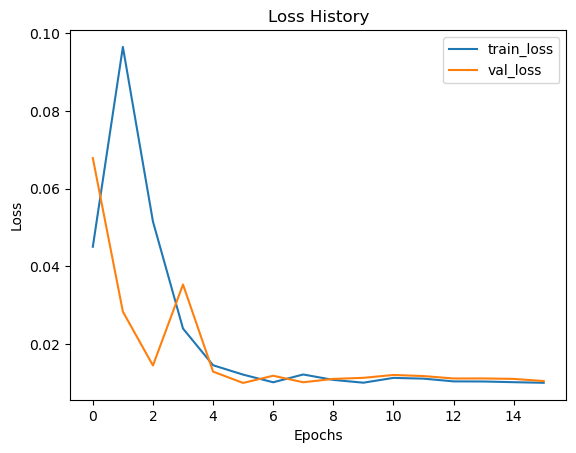

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

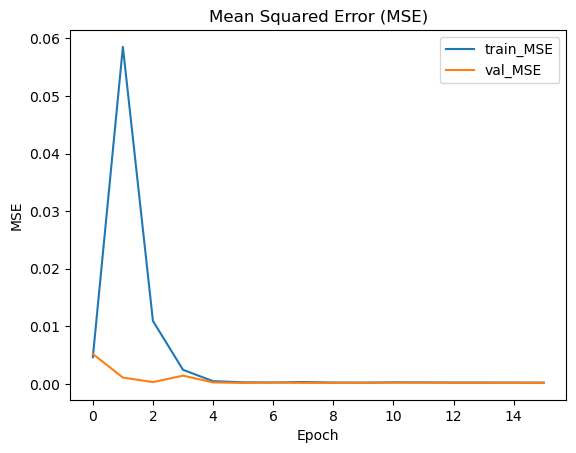

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

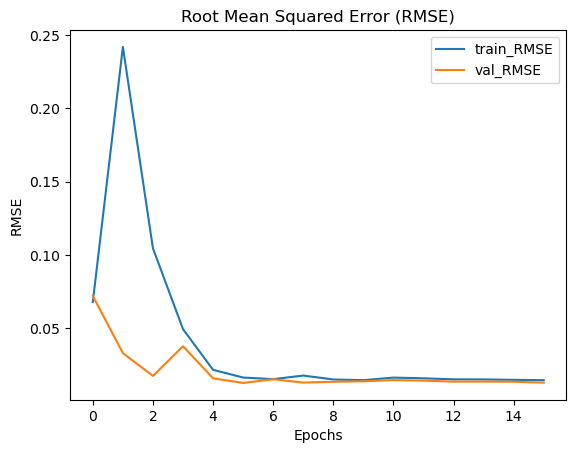

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

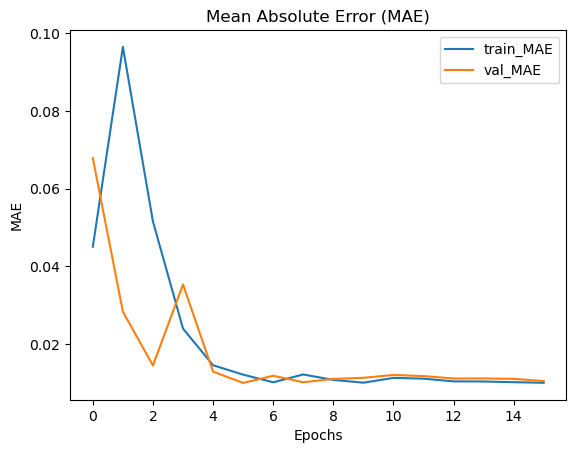

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

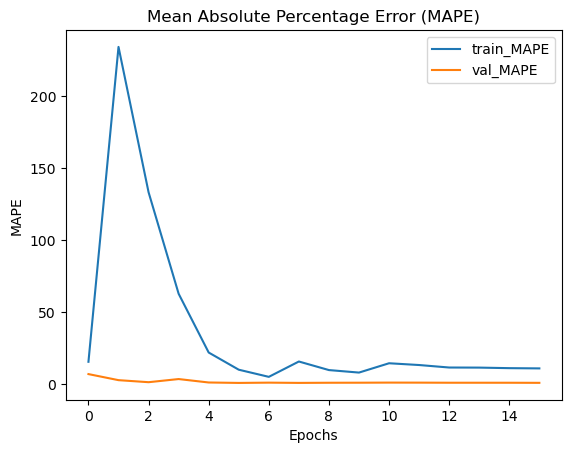

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:39:26.264910: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


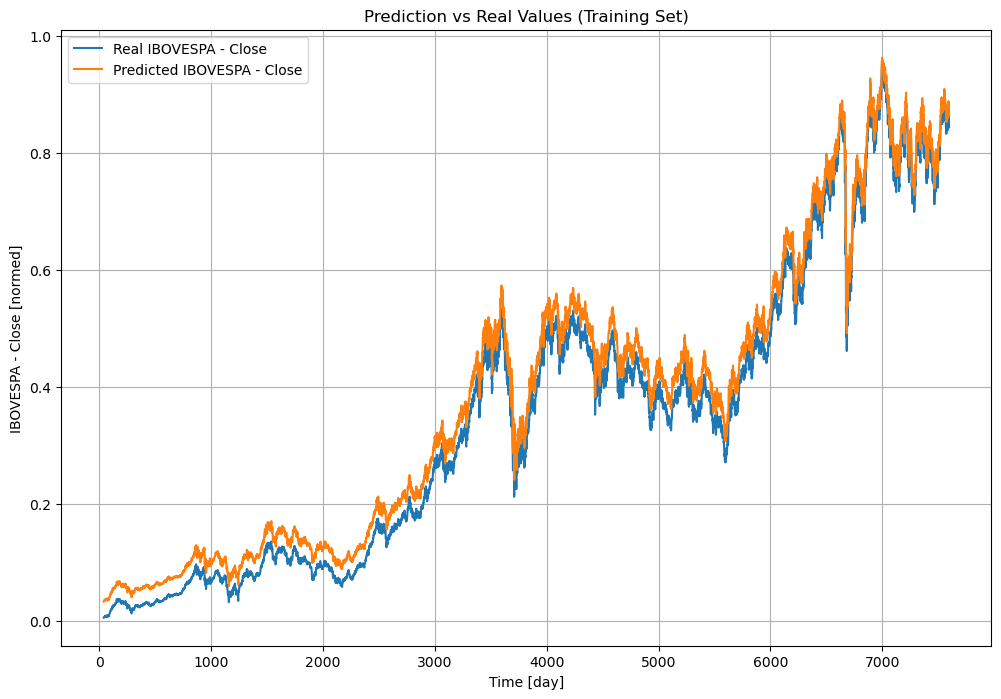

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


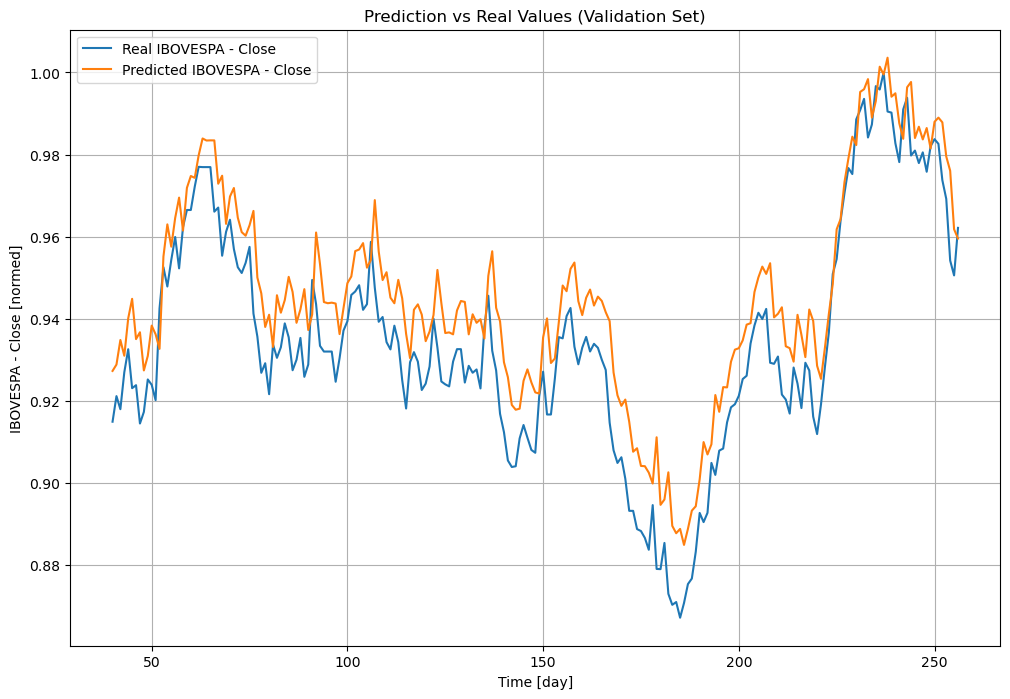

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


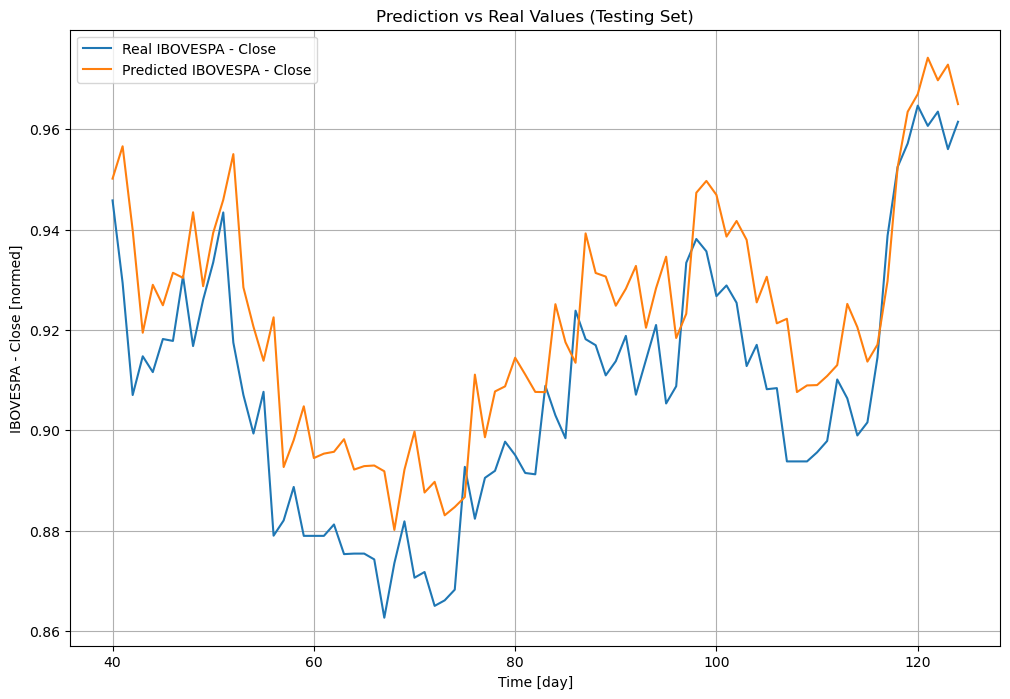

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

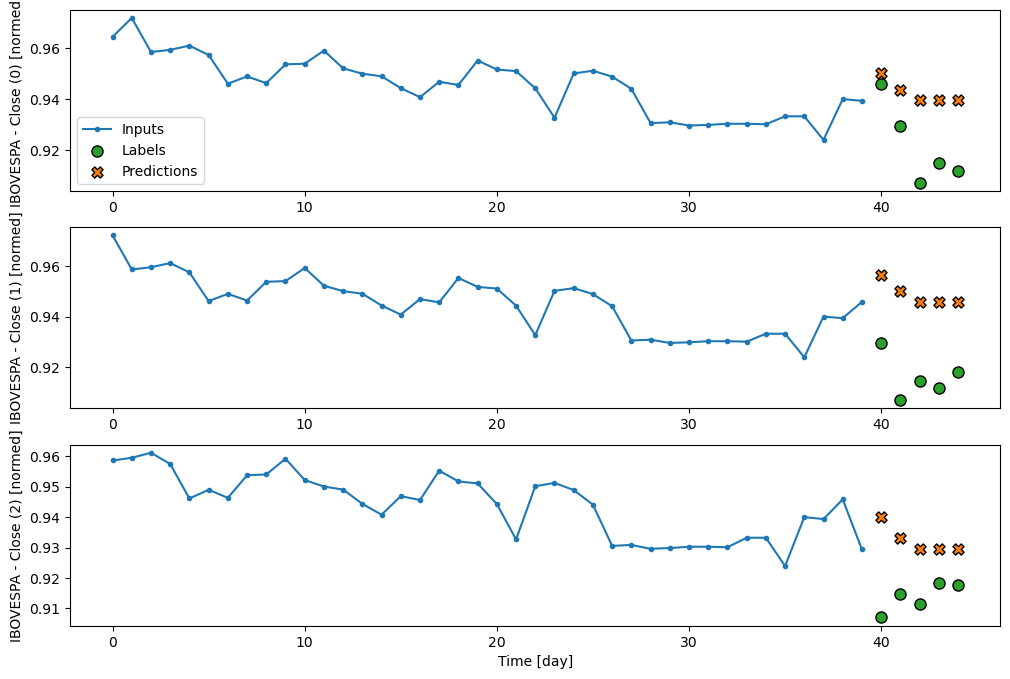

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:0s:755ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[[0.9501518 , 0.9501518 , 0.9501518 , ..., 0.9501518 ,
         0.9501518 , 0.9501518 ],
        [0.94347537, 0.94347537, 0.94347537, ..., 0.94347537,
         0.94347537, 0.94347537],
        [0.9396466 , 0.9396466 , 0.9396466 , ..., 0.9396466 ,
         0.9396466 , 0.9396466 ],
        [0.9395899 , 0.9395899 , 0.9395899 , ..., 0.9395899 ,
         0.9395899 , 0.9395899 ],
        [0.9395128 , 0.9395128 , 0.9395128 , ..., 0.9395128 ,
         0.93951285, 0.93951285]],

       [[0.95659673, 0.95659673, 0.95659673, ..., 0.95659673,
         0.95659673, 0.95659673],
        [0.9499053 , 0.9499053 , 0.9499053 , ..., 0.9499053 ,
         0.9499053 , 0.9499053 ],
        [0.94593096, 0.94593096, 0.94593096, ..., 0.94593096,
         0.94593096, 0.94593096],
        [0.94582206, 0.94582206, 0.94582206, ..., 0.94582206,
         0.94582206, 0.94582206],
        [0.9457101 , 0.9457101 , 0.9457101 , ..., 0.9457101 ,
         0.94570994, 0.94570994]],

       [[0.9398687 , 0.9398687 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')